In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import time as time
import pyarrow as pa
import dask.dataframe as dd
from dask.distributed import Client
import dask
import gc
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

In [20]:
#importing dataset
paths = ["/share/data1/xzcaplbl/100m_1982_to_2022_8.3MW.nc"]
#ds = xr.open_mfdataset(paths, parallel=True,chunks={'latitude': -1, 'longitude': -1, 'time': -1} ,concat_dim='time', data_vars='minimal',combine='nested',coords='minimal',compat='override')
ds = xr.open_mfdataset(paths,concat_dim='time', data_vars='minimal',combine='nested',coords='minimal',compat='override')

https://www.statista.com/statistics/517845/average-electricity-consumption-uk/

In [21]:
csv_data = """Region,Domestic energy consumption (Kwh)
East of England, 4075.8
South East, 4065.0
South West, 4010.8
Scotland, 3736.9
East Midlands, 3668.2
West Midlands, 3652.7
North West, 3516.2
Wales, 3472.4
Yorkshire, 3468.6
London, 3448.05
North East, 3165.0
Northern Ireland, 3465.0 
"""

csv_data2 = """Region,Population
East of England, 6348096
South East, 9294023
South West, 5712840
Scotland, 5479900
East Midlands, 4880094
West Midlands, 5954240
North West, 7422295
Wales, 3105410
Yorkshire, 5481431
London, 8796628
North East, 2646772
Northern Ireland, 1904563 
"""

In [22]:
from tabulate import tabulate

lines1 = csv_data.strip().split('\n')
lines2 = csv_data2.strip().split('\n')

# Print the values in a nicely formatted table
print("Energy consumption per Household (Kwh):")
table1 = [line.split(',') for line in lines1]
print(tabulate(table1, headers="firstrow", tablefmt="fancy_grid"))

print("\nPopulation by region")
table2 = [line.split(',') for line in lines2]
print(tabulate(table2, headers="firstrow", tablefmt="fancy_grid"))


Energy consumption per Household (Kwh):
╒══════════════════╤═════════════════════════════════════╕
│ Region           │   Domestic energy consumption (Kwh) │
╞══════════════════╪═════════════════════════════════════╡
│ East of England  │                             4075.8  │
├──────────────────┼─────────────────────────────────────┤
│ South East       │                             4065    │
├──────────────────┼─────────────────────────────────────┤
│ South West       │                             4010.8  │
├──────────────────┼─────────────────────────────────────┤
│ Scotland         │                             3736.9  │
├──────────────────┼─────────────────────────────────────┤
│ East Midlands    │                             3668.2  │
├──────────────────┼─────────────────────────────────────┤
│ West Midlands    │                             3652.7  │
├──────────────────┼─────────────────────────────────────┤
│ North West       │                             3516.2  │
├───────────────

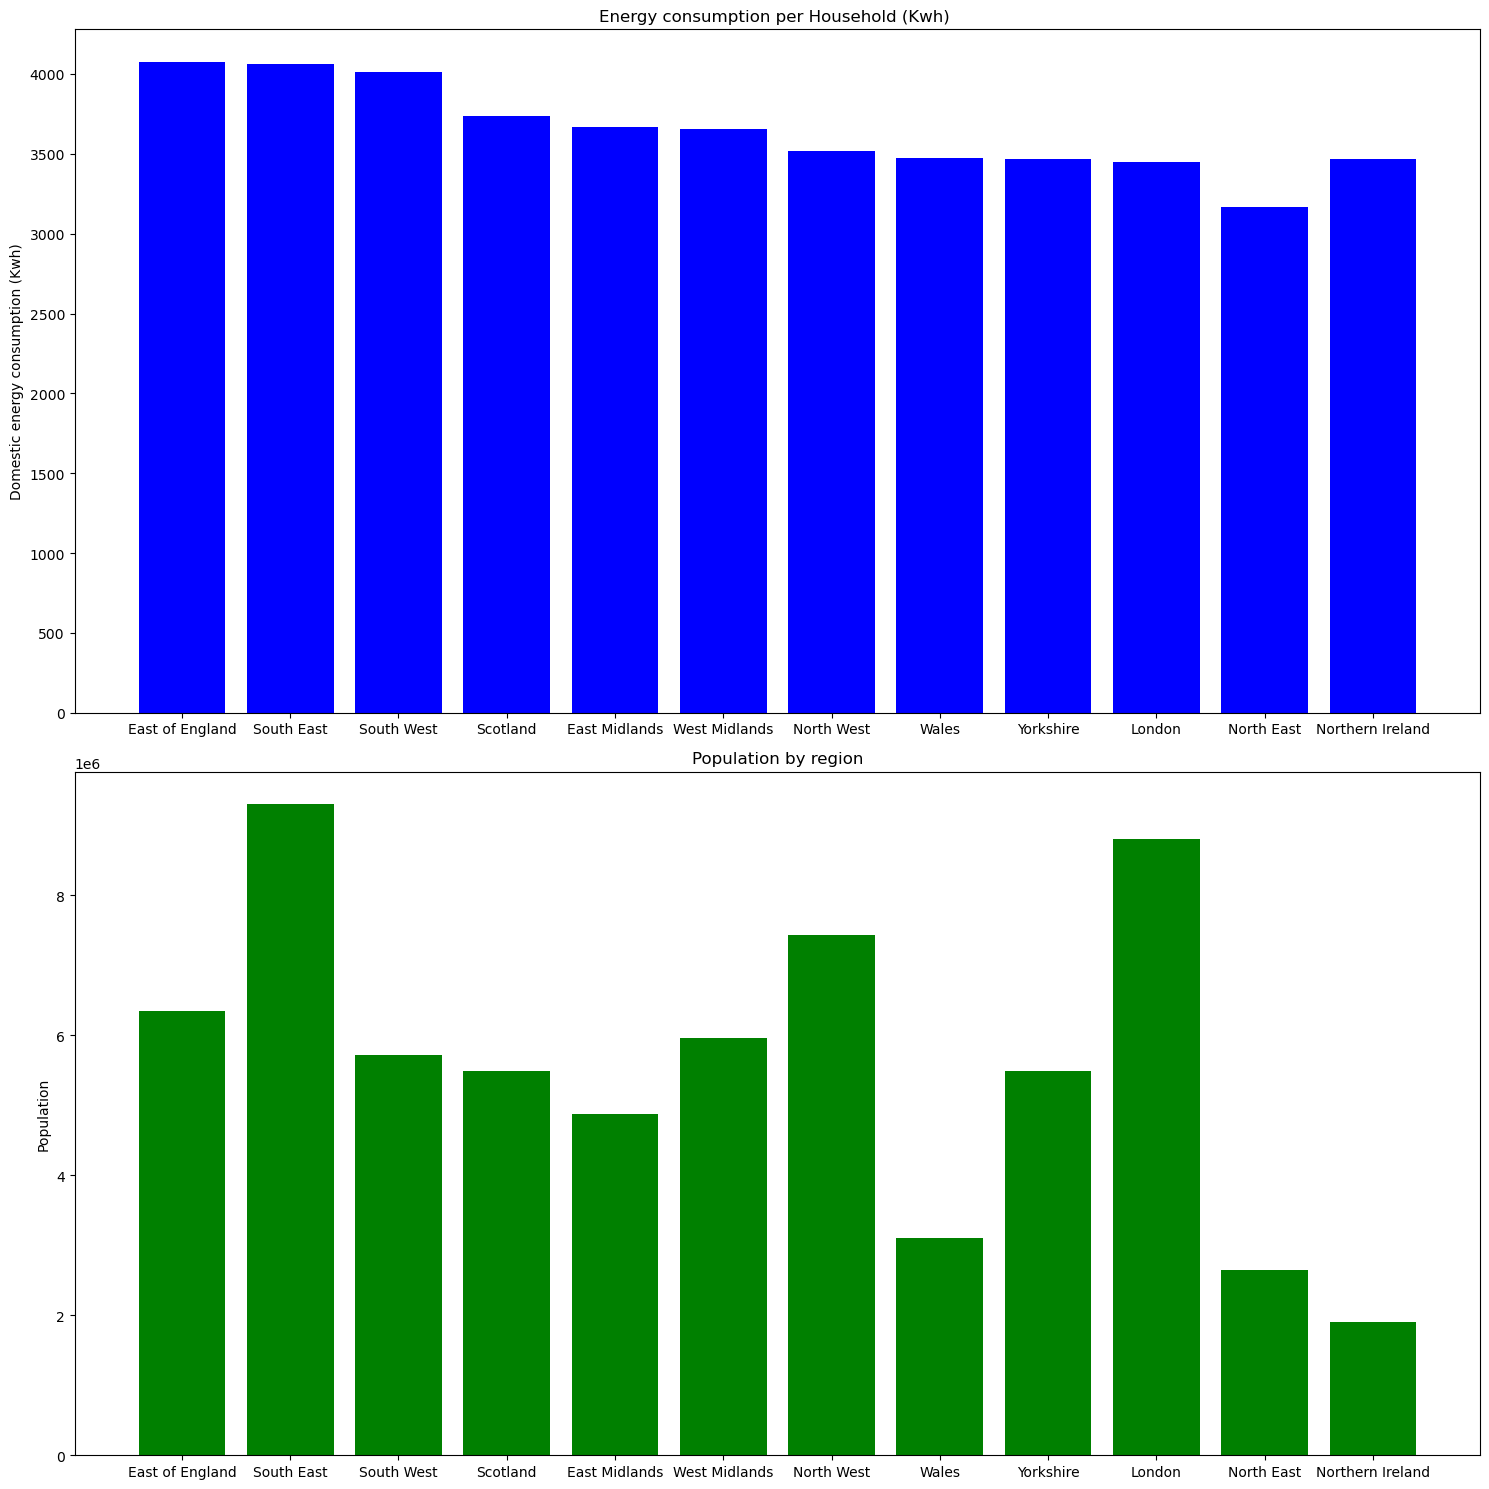

In [23]:

# Extract data for plotting
labels1, values1 = [], []
for line in csv_data.strip().split('\n')[1:]:
    parts = line.split(',')
    labels1.append(parts[0])
    values1.append(float(parts[1]))

labels2, values2 = [], []
for line in csv_data2.strip().split('\n')[1:]:
    parts = line.split(',')
    labels2.append(parts[0])
    values2.append(float(parts[1]))

# Create bar plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

# Plot for CSV Data 1
ax1.bar(labels1, values1, color='blue')
ax1.set_title('Energy consumption per Household (Kwh) ')
ax1.set_ylabel('Domestic energy consumption (Kwh)')

# Plot for CSV Data 2
ax2.bar(labels2, values2, color='green')
ax2.set_title('Population by region')
ax2.set_ylabel('Population')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()


In [24]:
csv_data3 = """Region,Total Household Energy consumption (Twh)
East of England, 25.874
South East, 37.780
South West, 22.913
Scotland, 20.478
East Midlands, 17.901
West Midlands, 21.749
North West, 26.098
Wales, 10.783
Yorkshire, 19.013
London, 30.331
North East, 8.377
Northern Ireland, 6.599
"""


╒══════════════════╤════════════════════════════════════════════╕
│ Region           │   Total Household Energy consumption (Twh) │
╞══════════════════╪════════════════════════════════════════════╡
│ East of England  │                                     25.874 │
├──────────────────┼────────────────────────────────────────────┤
│ South East       │                                     37.78  │
├──────────────────┼────────────────────────────────────────────┤
│ South West       │                                     22.913 │
├──────────────────┼────────────────────────────────────────────┤
│ Scotland         │                                     20.478 │
├──────────────────┼────────────────────────────────────────────┤
│ East Midlands    │                                     17.901 │
├──────────────────┼────────────────────────────────────────────┤
│ West Midlands    │                                     21.749 │
├──────────────────┼────────────────────────────────────────────┤
│ North W

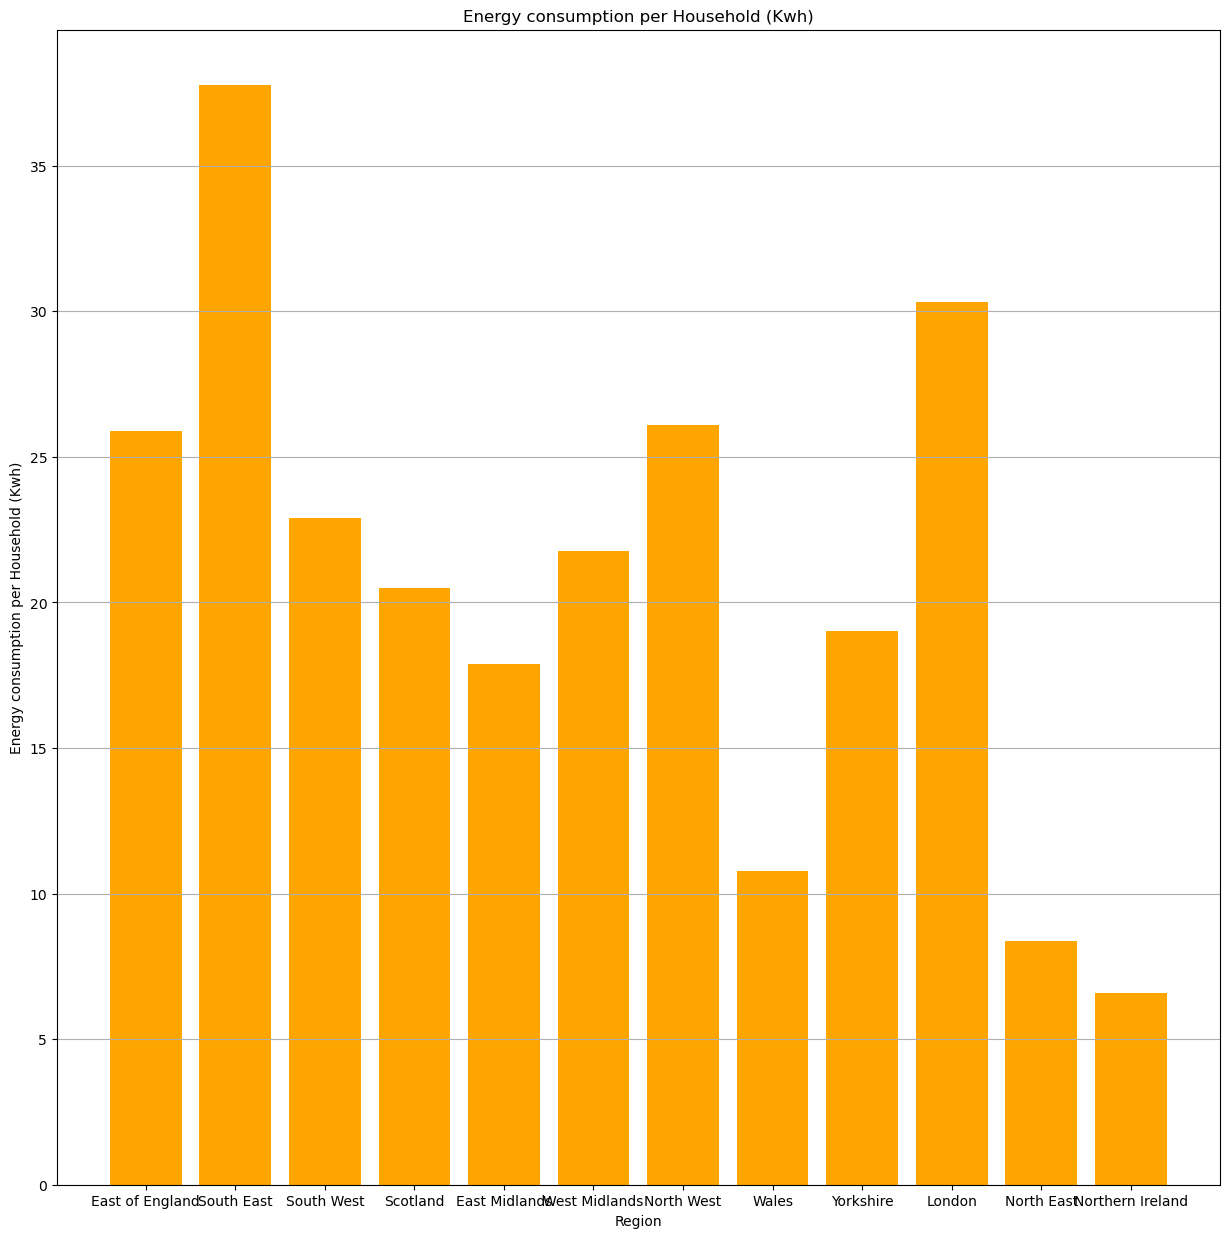

In [25]:
lines3 = csv_data3.strip().split('\n')

print("")
table3 = [line.split(',') for line in lines3]
print(tabulate(table3, headers="firstrow", tablefmt="fancy_grid"))


# Extract data for plotting
labels3, values3 = [], []
for line in csv_data3.strip().split('\n')[1:]:
    parts = line.split(',')
    labels3.append(parts[0])
    values3.append(float(parts[1]))

# Create a bar chart for CSV Data 3
plt.figure(figsize=(15, 15))
plt.bar(labels3, values3, color='orange')
plt.title('Energy consumption per Household (Kwh)')
plt.xlabel('Region')
plt.ylabel('Energy consumption per Household (Kwh)')
plt.grid(axis='y')
plt.show()



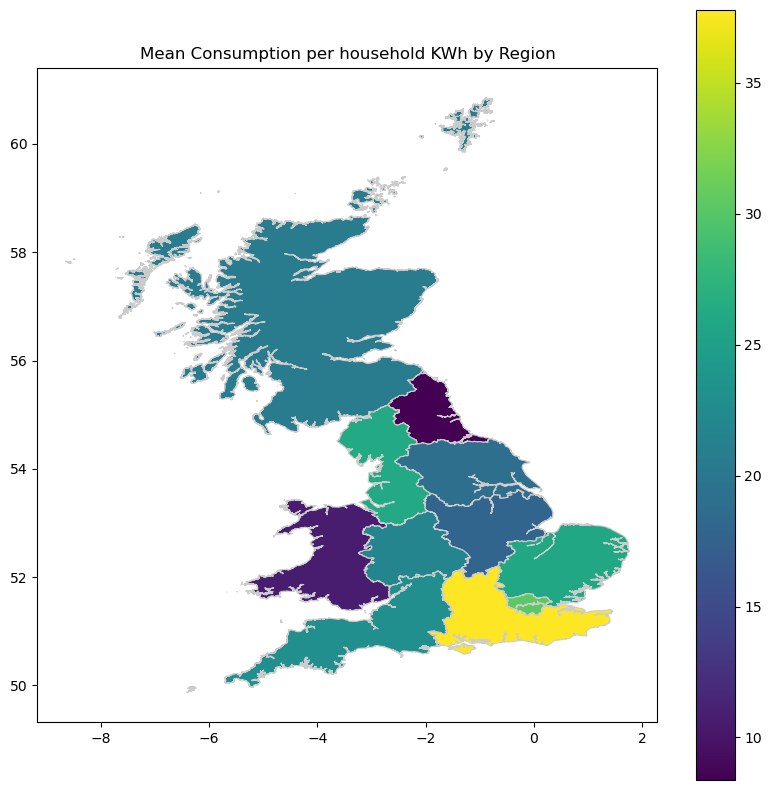

In [26]:

Regions = ['Eastern', 'South East', 'South West', 'Scotland', 'East Midlands', 'West Midlands',  'North West', 'Wales', 'Yorkshire and The Humber', 'London', 'North East','Northern Ireland']
Mean = [25.874,37.78,22.913,20.478,17.901,21.749,26.098,10.783,19.013,30.331,8.377,6.599]

# Create a DataFrame with region names and mean consumption
data = {'Region': Regions, 'MeanConsumption': Mean}
df = pd.DataFrame(data)

# Load the UK map shapefiles for different regions
uk_map_eer = gpd.read_file('england.json')  # Replace with the actual path to your shapefile for EER regions
uk_map_scotland = gpd.read_file('scotland.json')  # Replace with the actual path to your shapefile for Scotland
uk_map_wales = gpd.read_file('wales.json')  # Replace with the actual path to your shapefile for Wales

# Fix invalid geometries
uk_map_eer['geometry'] = uk_map_eer['geometry'].buffer(0)
uk_map_scotland['geometry'] = uk_map_scotland['geometry'].buffer(0)
uk_map_wales['geometry'] = uk_map_wales['geometry'].buffer(0)

# Assume that the column for region names is 'EER13NM' - replace it with the correct column name
map_with_data_eer = uk_map_eer.merge(df, how='left', left_on='EER13NM', right_on='Region')
map_with_data_scotland = uk_map_scotland.merge(df, how='left', left_on='EER13NM', right_on='Region')  # Replace 'Your_Scotland_Column' with the correct column name
map_with_data_wales = uk_map_wales.merge(df, how='left', left_on='EER13NM', right_on='Region')  # Replace 'Your_Wales_Column' with the correct column name

# Merge all GeoDataFrames into one
map_with_data_all = pd.concat([map_with_data_eer, map_with_data_scotland, map_with_data_wales], ignore_index=True)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
map_with_data_all.plot(column='MeanConsumption', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title
plt.title('Mean Consumption per household KWh by Region')

# Display the plot
plt.show()



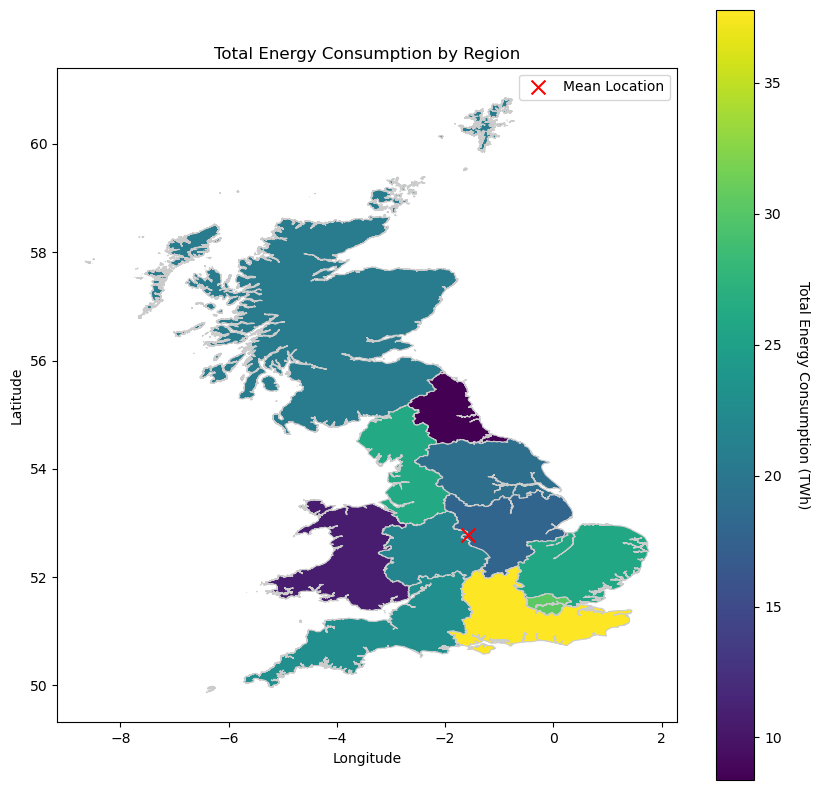

In [37]:

# Create a DataFrame with region names and mean consumption
data = {'Region': Regions, 'MeanConsumption': Mean}
df = pd.DataFrame(data)

# Load the UK map shapefiles for different regions
uk_map_eer = gpd.read_file('england.json')  # Replace with the actual path to your shapefile for EER regions
uk_map_scotland = gpd.read_file('scotland.json')  # Replace with the actual path to your shapefile for Scotland
uk_map_wales = gpd.read_file('wales.json')  # Replace with the actual path to your shapefile for Wales

# Fix invalid geometries
uk_map_eer['geometry'] = uk_map_eer['geometry'].buffer(0)
uk_map_scotland['geometry'] = uk_map_scotland['geometry'].buffer(0)
uk_map_wales['geometry'] = uk_map_wales['geometry'].buffer(0)

# Assume that the column for region names is 'EER13NM' - replace it with the correct column name
map_with_data_eer = uk_map_eer.merge(df, how='left', left_on='EER13NM', right_on='Region')
map_with_data_scotland = uk_map_scotland.merge(df, how='left', left_on='EER13NM', right_on='Region')
map_with_data_wales = uk_map_wales.merge(df, how='left', left_on='EER13NM', right_on='Region')

# Merge all GeoDataFrames into one
map_with_data_all = pd.concat([map_with_data_eer, map_with_data_scotland, map_with_data_wales], ignore_index=True)

# Calculate the total energy consumption for each region
total_energy_region = map_with_data_all.groupby('Region')['MeanConsumption'].sum()

# Calculate the weighted mean location
mean_location_x = sum(map_with_data_all['geometry'].centroid.x * map_with_data_all['MeanConsumption']) / total_energy_region.sum()
mean_location_y = sum(map_with_data_all['geometry'].centroid.y * map_with_data_all['MeanConsumption']) / total_energy_region.sum()

# Create a GeoDataFrame for the mean location
mean_location_df = gpd.GeoDataFrame(geometry=gpd.points_from_xy([mean_location_x], [mean_location_y]))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
map_with_data_all.plot(column='MeanConsumption', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True )
# Plot the mean location
mean_location_df.plot(ax=ax, color='red', marker='x', markersize=100, label='Mean Location')


# Add a title
plt.title('Total Energy Consumption by Region')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc= 'best')

# Add a legend with colorbar and specify units
cbar = ax.get_figure().get_axes()[1] 
cbar.set_ylabel('Total Energy Consumption (TWh)', rotation=270, labelpad=20)

# Display the plot
plt.show()




In [10]:
# Print the mean location coordinates
print("Mean Location Coordinates:")
print("Latitude:", mean_location_y)
print("Longitude:", mean_location_x)

Mean Location Coordinates:
Latitude: 52.776584171224556
Longitude: -1.5821643532504668


In [38]:
def v_wind_eval(orig_height, target_height, wind_speeds, surface_roughness):
    """Evaluates the wind speed at a certain height using formula, outputs array"""
    
    alpha = 0.5*(surface_roughness/10)**0.2
    speeds = wind_speeds*(target_height/orig_height)**alpha
    
    return speed_arr

def wind_power_output(pwr_crv_str, speed_arr):
    """Uses power curve data from NRES and array of speeds to create correlated array of power outputs in MW of 
    that wind turbine in relation to each of those speeds. Power curve array has 3 columns: speed, power output, 
    capacity factor"""

    power_curve = np.loadtxt(pwr_crv_str,delimiter=",", dtype=str)
    power_curve = power_curve[1:,:].astype('float')
    speed_limited = np.where((speed_arr>25) | (speed_arr<0),0,speed_arr) #curtails power output above max
    power_outputs = np.interp(speed_limited,power_curve[:,0],power_curve[:,1])
    
    return power_outputs

In [39]:
file_path = file_path = "/share/data1/xzcaplbl/data/1982_to_2022.grib"
# Open the GRIB file using xarray
x = xr.open_dataset(file_path, engine='cfgrib')

# Print the dataset information

# Access specific variables or slices
u100_data = x['u100'].values
v100_data = x['v100'].values
latitude_values = x['latitude'].values
longitude_values = x['longitude'].values
time_value = x["time"].values





In [40]:
dsx = xr.Dataset(
    {'latitude': (['lat'], latitude_values),
     'longitude': (['lon'], longitude_values),
     'u100': (['time', 'lat', 'lon'], u100_data),
     'v100': (['time', 'lat', 'lon'], v100_data)},
    coords={'time': ('time', time_value)}
)
wind_speed = np.sqrt(u100_data**2 + v100_data**2)

In [41]:
# Extract u100m and v100m components
u100_data = x['u100'].values
v100_data = x['v100'].values

# Calculate the wind speed magnitude
wind_speed = np.sqrt(u100_data**2 + v100_data**2)

# Calculate the average wind speed over all time steps
average_wind_speed = np.mean(wind_speed, axis=0)

# Flip the average wind speed upside down
flipped_wind_speed = np.flipud(average_wind_speed)
flipped_longitude = np.flipud(dsx['longitude'])
flipped_latitude= np.flipud(dsx['latitude'])



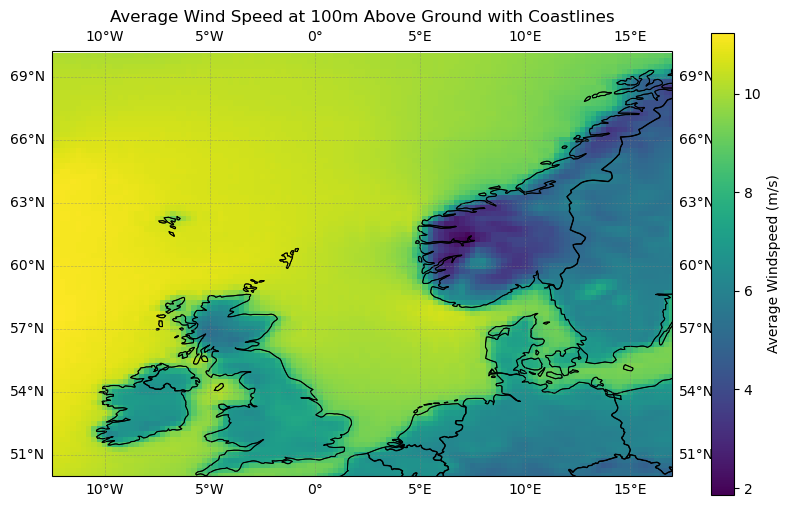

In [42]:
# Assuming flipped_wind_speed contains your wind speed data (flipped if needed)
flipped_wind_speed = np.flipud(average_wind_speed)

# Create a map with coastlines and wind speed overlay
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-12.5, 17, 50, 70])

# Create latitude and longitude grids
lon, lat = np.meshgrid(dsx['longitude'], flipped_latitude)

# Plot wind speed using pcolormesh
pcm1 = ax.pcolormesh(lon, lat, flipped_wind_speed, cmap='viridis', shading='auto')
plt.colorbar(pcm1, label='Average Windspeed (m/s)')


# Add coastlines with the cartopy.feature module
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor='black')

# Add country borders
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    edgecolor='black',
    facecolor='none'
)
ax.add_feature(countries, linestyle='-', linewidth=0.5)

# Add borders to specific countries (e.g., Germany and France)
borders = cfeature.BORDERS
ax.add_feature(borders, linestyle='-', linewidth=1, edgecolor='black', facecolor='none', zorder=10)


ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')


# Set the title
plt.title('Average Wind Speed at 100m Above Ground with Coastlines')
plt.grid()

# Show the plot
plt.show()




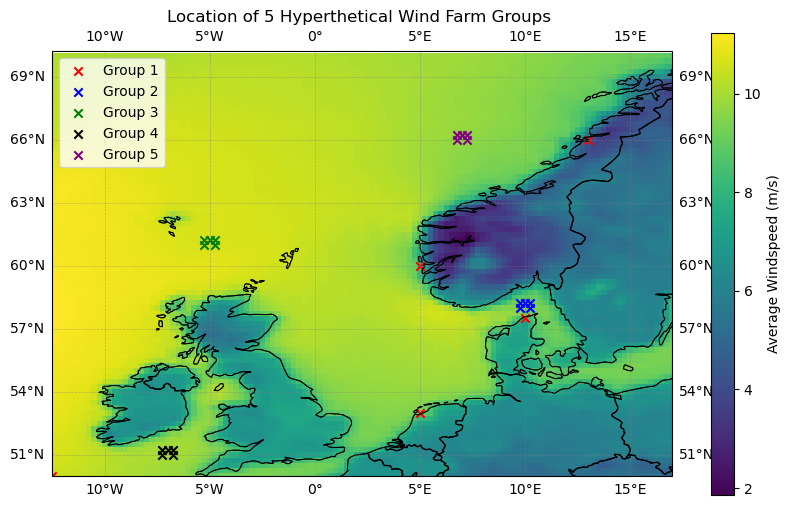

In [43]:

# Coordinates for specific points for 5 groups
specific_points = {
    'Group 1': {'color': 'red', 'points': [[50, -12.5], [57.5, 10], [53, 5], [60, 5], [66, 13]]},
    'Group 2': {'color': 'blue', 'points': [[58.25, 10], [58, 10.25], [58, 9.75], [58.25, 9.75], [58.25, 10.25]]},
    'Group 3': {'color': 'green', 'points': [[61.25, -5], [61, -4.75], [61, -5.25], [61.25, -5.25], [61.25, -4.75]]},
    'Group 4': {'color': 'black', 'points': [[51.25, -7], [51, -6.75], [51, -7.25], [51.25, -7.25], [51.25, -6.75]]},
    'Group 5': {'color': 'purple', 'points': [[66.25, 7], [66, 7.25], [66, 6.75], [66.25, 6.75], [66.25, 7.25]]}
}

# Assuming flipped_wind_speed contains your wind speed data (flipped if needed)
flipped_wind_speed = np.flipud(average_wind_speed)

# Create a map with coastlines and wind speed overlay
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-12.5, 17, 50, 70])

# Create latitude and longitude grids
lon, lat = np.meshgrid(dsx['longitude'], flipped_latitude)

# Plot wind speed using pcolormesh
pcm1 = ax.pcolormesh(lon, lat, flipped_wind_speed, cmap='viridis', shading='auto')
plt.colorbar(pcm1, label='Average Windspeed (m/s)')

# Plot crosses at specific points for each group
for group, data in specific_points.items():
    color = data['color']
    points = data['points']
    ax.scatter([point[1] for point in points], [point[0] for point in points], marker='x', color=color, label=group, transform=ccrs.PlateCarree())

# Add coastlines with the cartopy.feature module
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor='black')

# Add country borders
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    edgecolor='black',
    facecolor='none'
)
ax.add_feature(countries, linestyle='-', linewidth=0.5)

# Add borders to specific countries (e.g., Germany and France)
borders = cfeature.BORDERS
ax.add_feature(borders, linestyle='-', linewidth=1, edgecolor='black', facecolor='none', zorder=10)

ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Create legend
ax.legend(loc='best')

# Set the title
plt.title('Location of 5 Hyperthetical Wind Farm Groups ')

# Show the plot
plt.show()



AttributeError: PatchCollection.set() got an unexpected keyword argument 'cbar_label'

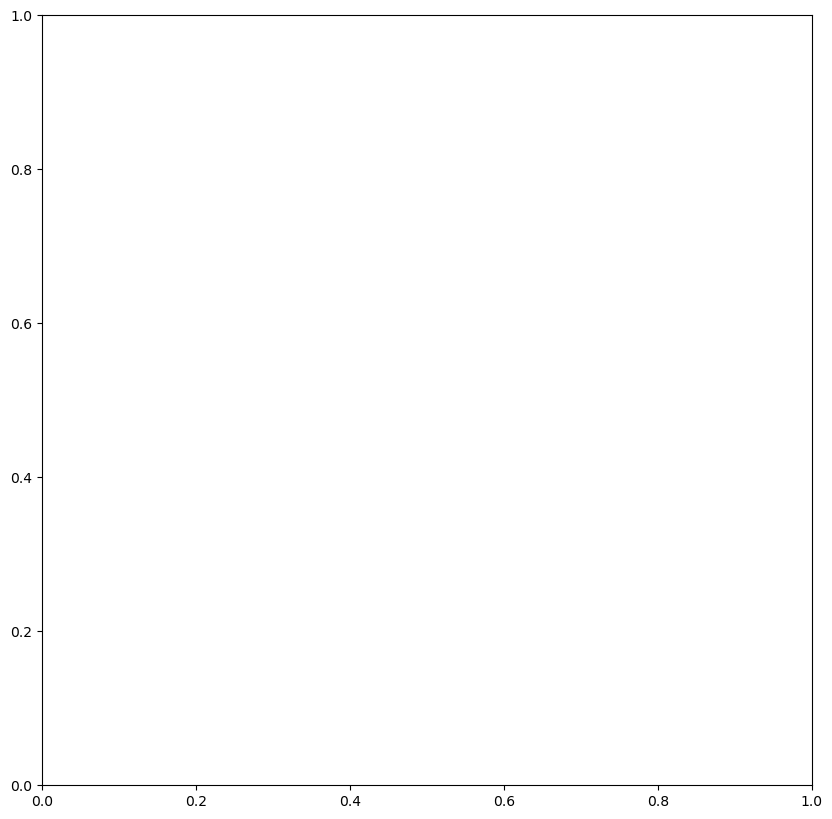

In [44]:




# Create a DataFrame with region names and mean consumption
data = {'Region': Regions, 'MeanConsumption': Mean}
df = pd.DataFrame(data)

# Load the UK map shapefiles for different regions
uk_map_eer = gpd.read_file('england.json')  # Replace with the actual path to your shapefile for EER regions
uk_map_scotland = gpd.read_file('scotland.json')  # Replace with the actual path to your shapefile for Scotland
uk_map_wales = gpd.read_file('wales.json')  # Replace with the actual path to your shapefile for Wales

# Fix invalid geometries
uk_map_eer['geometry'] = uk_map_eer['geometry'].buffer(0)
uk_map_scotland['geometry'] = uk_map_scotland['geometry'].buffer(0)
uk_map_wales['geometry'] = uk_map_wales['geometry'].buffer(0)

# Assume that the column for region names is 'EER13NM' - replace it with the correct column name
map_with_data_eer = uk_map_eer.merge(df, how='left', left_on='EER13NM', right_on='Region')
map_with_data_scotland = uk_map_scotland.merge(df, how='left', left_on='EER13NM', right_on='Region')
map_with_data_wales = uk_map_wales.merge(df, how='left', left_on='EER13NM', right_on='Region')

# Merge all GeoDataFrames into one
map_with_data_all = pd.concat([map_with_data_eer, map_with_data_scotland, map_with_data_wales], ignore_index=True)

# Calculate the total energy consumption for each region
total_energy_region = map_with_data_all.groupby('Region')['MeanConsumption'].sum()

# Calculate the weighted mean location
mean_location_x = sum(map_with_data_all['geometry'].centroid.x * map_with_data_all['MeanConsumption']) / total_energy_region.sum()
mean_location_y = sum(map_with_data_all['geometry'].centroid.y * map_with_data_all['MeanConsumption']) / total_energy_region.sum()

# Create a GeoDataFrame for the mean location
mean_location_df = gpd.GeoDataFrame(geometry=gpd.points_from_xy([mean_location_x], [mean_location_y]))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
map_with_data_all.plot(column='MeanConsumption', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cbar_label='TWh')

# Plot the mean location
mean_location_df.plot(ax=ax, color='red', marker='x', markersize=100, label='Mean Location')

# Add a title

plt.title('Mean Consumption per household KWh by Region')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add a legend
ax.legend()

print(mean_location_x)
print(mean_location_y)

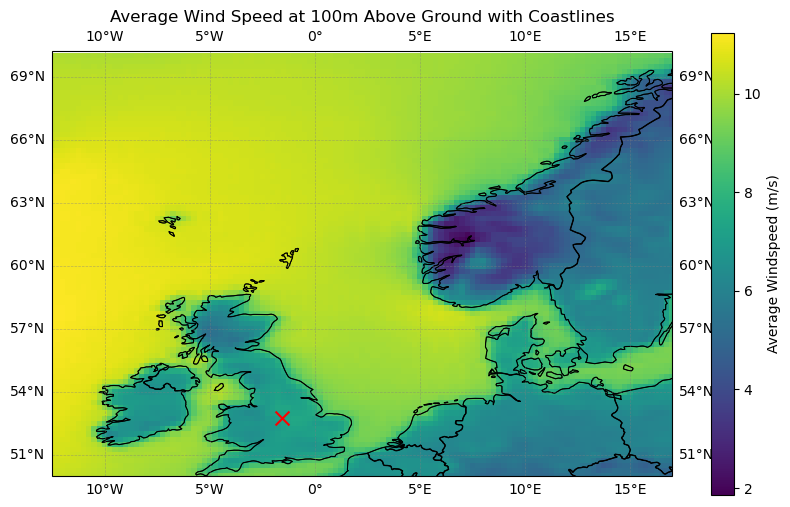

In [45]:
# Assuming flipped_wind_speed contains your wind speed data (flipped if needed)
flipped_wind_speed = np.flipud(average_wind_speed)

# Specify the location for the cross
cross_location = (mean_location_x,mean_location_y)  # Example coordinates (longitude, latitude)

# Create a map with coastlines and wind speed overlay
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-12.5, 17, 50, 70])

# Create latitude and longitude grids
lon, lat = np.meshgrid(dsx['longitude'], flipped_latitude)

# Plot wind speed using pcolormesh
pcm1 = ax.pcolormesh(lon, lat, flipped_wind_speed, cmap='viridis', shading='auto')
plt.colorbar(pcm1, label='Average Windspeed (m/s)')

# Add coastlines with the cartopy.feature module
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor='black')

# Add country borders
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    edgecolor='black',
    facecolor='none'
)
ax.add_feature(countries, linestyle='-', linewidth=0.5)

# Add borders to specific countries (e.g., Germany and France)
borders = cfeature.BORDERS
ax.add_feature(borders, linestyle='-', linewidth=1, edgecolor='black', facecolor='none', zorder=10)

# Plot the cross at the specified location
ax.scatter(cross_location[0], cross_location[1], marker='x', color='red', s=100, transform=ccrs.PlateCarree())

ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Set the title
plt.title('Average Wind Speed at 100m Above Ground with Coastlines')
plt.grid()

# Show the plot
plt.show()


In [46]:
#Group 0
coords = np.empty((5,5,2))
coords[0,0,:] = np.array([50, -12.5])
coords[0,1,:] = np.array([57.5, 10])
coords[0,2,:] = np.array([53, 5.0])
coords[0,3,:] = np.array([60, 5])
coords[0,4,:] = np.array([66, 13])

#Group 1
lat = 58
lon = 10
coords[1,0,:] = np.array([lat+0.25, lon])
coords[1,1,:] = np.array([lat, lon+0.25])
coords[1,2,:] = np.array([lat, lon-0.25])
coords[1,3,:] = np.array([lat+0.25, lon-0.25])
coords[1,4,:] = np.array([lat+0.25, lon+0.25])

#Group 2
lat = 61
lon = -5
coords[2,0,:] = np.array([lat+0.25, lon])
coords[2,1,:] = np.array([lat, lon+0.25])
coords[2,2,:] = np.array([lat, lon-0.25])
coords[2,3,:] = np.array([lat+0.25, lon-0.25])
coords[2,4,:] = np.array([lat+0.25, lon+0.25])

#Group 4

lat = 51
lon = -7
coords[3,0,:] = np.array([lat+0.25, lon])
coords[3,1,:] = np.array([lat, lon+0.25])
coords[3,2,:] = np.array([lat, lon-0.25])
coords[3,3,:] = np.array([lat+0.25, lon-0.25])
coords[3,4,:] = np.array([lat+0.25, lon+0.25])

lat = 66
lon = 7
coords[4,0,:] = np.array([lat+0.25, lon])
coords[4,1,:] = np.array([lat, lon+0.25])
coords[4,2,:] = np.array([lat, lon-0.25])
coords[4,3,:] = np.array([lat+0.25, lon-0.25])
coords[4,4,:] = np.array([lat+0.25, lon+0.25])

coords = (np.round(coords*4, decimals=0)/4)


color = ['r','b','g','m',"c"]

In [47]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance


The distance between (-1.6, 52.8) and (-12.5, 50.0): 816.71 km
The distance between (-1.6, 52.8) and (10.0, 50.0): 861.64 km
The distance between (-1.6, 52.8) and (5.0, 53.0): 443.09 km
The distance between (-1.6, 52.8) and (5.0, 60.0): 896.71 km
The distance between (-1.6, 52.8) and (13.0, 66.0): 1674.99 km
The distance between (-1.6, 52.8) and (10.0, 58.0): 931.06 km
The distance between (-1.6, 52.8) and (-5.0, 61.0): 934.56 km
The distance between (-1.6, 52.8) and (7.0, 66.0): 1543.02 km
The distance between (-1.6, 52.8) and (-7.0, 51.0): 420.95 km


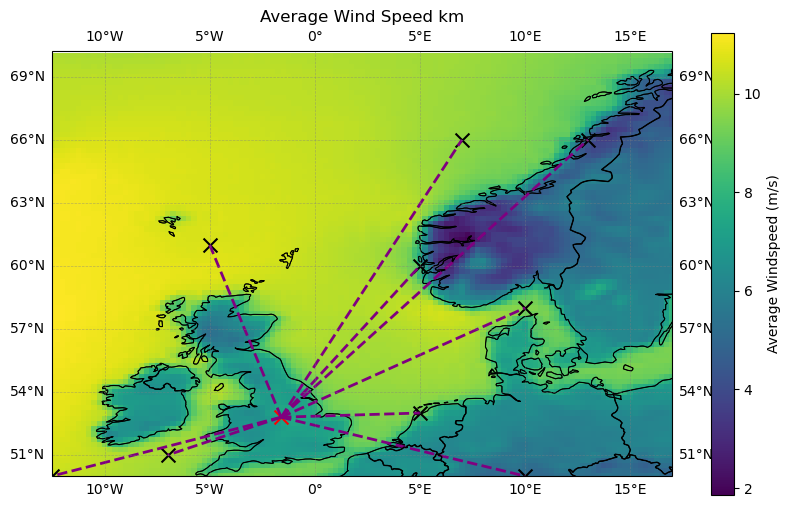

In [48]:
# Round mean_location_x and mean_location_y to two decimal places
mean_location_x = round(mean_location_x, 1)
mean_location_y = round(mean_location_y, 1)


# Specify the locations for the crosses
cross_location1 = (mean_location_x, mean_location_y)  # Example coordinates (longitude, latitude)
cross_location2 = (-12.5, 50.0)  # Example coordinates (longitude, latitude)
cross_location3 = (10.0, 50.0)
cross_location4 = (5.0, 53.0)
cross_location5 = (5.0, 60.0)
cross_location6 = (13.0, 66.0)
cross_location7 = (10.0, 58.0)
cross_location8 = (-5.0, 61.0)
cross_location9 = (7.0, 66.0)
cross_location10 = (-7.0, 51.0)

# Calculate the distance between the two points
distance1 = haversine_distance(cross_location1[1], cross_location1[0], cross_location2[1], cross_location2[0])
distance2 = haversine_distance(cross_location1[1], cross_location1[0], cross_location3[1], cross_location3[0])
distance3 = haversine_distance(cross_location1[1], cross_location1[0], cross_location4[1], cross_location4[0])
distance4 = haversine_distance(cross_location1[1], cross_location1[0], cross_location5[1], cross_location5[0])
distance5 = haversine_distance(cross_location1[1], cross_location1[0], cross_location6[1], cross_location6[0])
distance6 = haversine_distance(cross_location1[1], cross_location1[0], cross_location7[1], cross_location7[0])
distance7 = haversine_distance(cross_location1[1], cross_location1[0], cross_location8[1], cross_location8[0])
distance8 = haversine_distance(cross_location1[1], cross_location1[0], cross_location9[1], cross_location9[0])
distance9 = haversine_distance(cross_location1[1], cross_location1[0], cross_location10[1], cross_location10[0])

# Create a map with coastlines and wind speed overlay
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-12.5, 17, 50, 70])

# Create latitude and longitude grids
lon, lat = np.meshgrid(ds['longitude'], flipped_latitude)

# Plot wind speed using pcolormesh
pcm1 = ax.pcolormesh(lon, lat, flipped_wind_speed, cmap='viridis', shading='auto')
plt.colorbar(pcm1, label='Average Windspeed (m/s)')

# Add coastlines with the cartopy.feature module
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor='black')

# Add country borders
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    edgecolor='black',
    facecolor='none'
)
ax.add_feature(countries, linestyle='-', linewidth=0.5)

# Add borders to specific countries (e.g., Germany and France)
borders = cfeature.BORDERS
ax.add_feature(borders, linestyle='-', linewidth=1, edgecolor='black', facecolor='none', zorder=10)

# Plot the crosses at the specified locations
ax.scatter(cross_location1[0], cross_location1[1], marker='x', color='red', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location2[0], cross_location2[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location3[0], cross_location3[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location4[0], cross_location4[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location5[0], cross_location5[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location6[0], cross_location6[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location7[0], cross_location7[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location8[0], cross_location8[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location9[0], cross_location9[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location10[0], cross_location10[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())

# Plot a line connecting the two points
ax.plot([cross_location1[0], cross_location2[0]], [cross_location1[1], cross_location2[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location3[0]], [cross_location1[1], cross_location3[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location4[0]], [cross_location1[1], cross_location4[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location5[0]], [cross_location1[1], cross_location5[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location6[0]], [cross_location1[1], cross_location6[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location7[0]], [cross_location1[1], cross_location7[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location8[0]], [cross_location1[1], cross_location8[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location9[0]], [cross_location1[1], cross_location9[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location10[0]], [cross_location1[1], cross_location10[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())

ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Calculate and print distances for each pair
for i in range(1, 10):
    distance = haversine_distance(cross_location1[1], cross_location1[0],
                                  eval(f"cross_location{i + 1}")[1], eval(f"cross_location{i + 1}")[0])
    print(f"The distance between {cross_location1} and {eval(f'cross_location{i + 1}')}: {distance:.2f} km")



# Set the title
plt.title('Average Wind Speed km')
plt.grid()

# Show the plot
plt.show()


https://www.nationalgrid.com/sites/default/files/documents/13784-High%20Voltage%20Direct%20Current%20Electricity%20–%20technical%20information.pdf

This report the from the national grid states that the transmission losses for High Voltage Direct Current (HVDC) is between 0.3% - 0.6% per 100km. 

Therefore for the purposes of this project I will be taking the HVDC transmission loss as 0.45% per 100km 


The distance between (-1.6, 52.8) and (-12.5, 50.0): 816.71 km
Transmission Loss: 8.17%
The distance between (-1.6, 52.8) and (10.0, 50.0): 861.64 km
Transmission Loss: 8.62%
The distance between (-1.6, 52.8) and (5.0, 53.0): 443.09 km
Transmission Loss: 4.43%
The distance between (-1.6, 52.8) and (5.0, 60.0): 896.71 km
Transmission Loss: 8.97%
The distance between (-1.6, 52.8) and (13.0, 66.0): 1674.99 km
Transmission Loss: 16.75%
The distance between (-1.6, 52.8) and (10.0, 58.0): 931.06 km
Transmission Loss: 9.31%
The distance between (-1.6, 52.8) and (-5.0, 61.0): 934.56 km
Transmission Loss: 9.35%
The distance between (-1.6, 52.8) and (7.0, 66.0): 1543.02 km
Transmission Loss: 15.43%
The distance between (-1.6, 52.8) and (-7.0, 51.0): 420.95 km
Transmission Loss: 4.21%


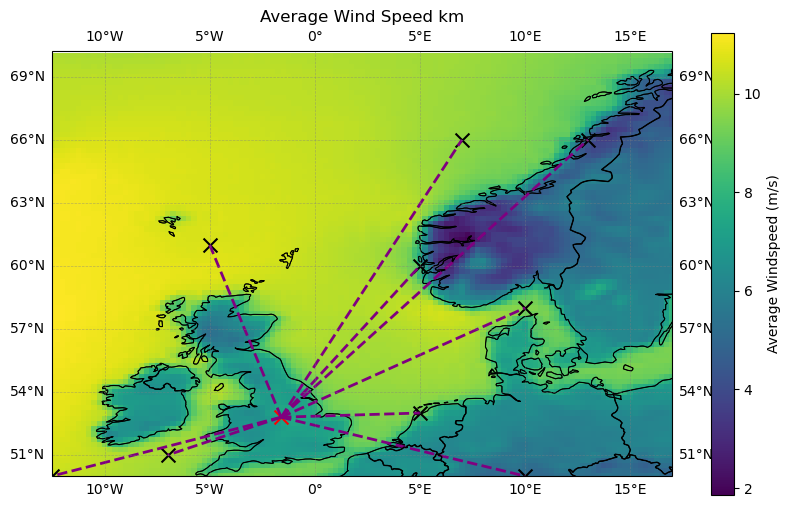

In [49]:
# Round mean_location_x and mean_location_y to two decimal places
mean_location_x = round(mean_location_x, 1)
mean_location_y = round(mean_location_y, 1)
transmission_loss_factor = 0.01


# Specify the locations for the crosses
cross_location1 = (mean_location_x, mean_location_y)  # Example coordinates (longitude, latitude)
cross_location2 = (-12.5, 50.0)  # Example coordinates (longitude, latitude)
cross_location3 = (10.0, 50.0)
cross_location4 = (5.0, 53.0)
cross_location5 = (5.0, 60.0)
cross_location6 = (13.0, 66.0)
cross_location7 = (10.0, 58.0)
cross_location8 = (-5.0, 61.0)
cross_location9 = (7.0, 66.0)
cross_location10 = (-7.0, 51.0)

# Calculate the distance between the two points
distance1 = haversine_distance(cross_location1[1], cross_location1[0], cross_location2[1], cross_location2[0])
distance2 = haversine_distance(cross_location1[1], cross_location1[0], cross_location3[1], cross_location3[0])
distance3 = haversine_distance(cross_location1[1], cross_location1[0], cross_location4[1], cross_location4[0])
distance4 = haversine_distance(cross_location1[1], cross_location1[0], cross_location5[1], cross_location5[0])
distance5 = haversine_distance(cross_location1[1], cross_location1[0], cross_location6[1], cross_location6[0])
distance6 = haversine_distance(cross_location1[1], cross_location1[0], cross_location7[1], cross_location7[0])
distance7 = haversine_distance(cross_location1[1], cross_location1[0], cross_location8[1], cross_location8[0])
distance8 = haversine_distance(cross_location1[1], cross_location1[0], cross_location9[1], cross_location9[0])
distance9 = haversine_distance(cross_location1[1], cross_location1[0], cross_location10[1], cross_location10[0])

# Create a map with coastlines and wind speed overlay
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-12.5, 17, 50, 70])

# Create latitude and longitude grids
lon, lat = np.meshgrid(ds['longitude'], flipped_latitude)

# Plot wind speed using pcolormesh
pcm1 = ax.pcolormesh(lon, lat, flipped_wind_speed, cmap='viridis', shading='auto')
plt.colorbar(pcm1, label='Average Windspeed (m/s)')

# Add coastlines with the cartopy.feature module
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor='black')

# Add country borders
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    edgecolor='black',
    facecolor='none'
)
ax.add_feature(countries, linestyle='-', linewidth=0.5)

# Add borders to specific countries (e.g., Germany and France)
borders = cfeature.BORDERS
ax.add_feature(borders, linestyle='-', linewidth=1, edgecolor='black', facecolor='none', zorder=10)

# Plot the crosses at the specified locations
ax.scatter(cross_location1[0], cross_location1[1], marker='x', color='red', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location2[0], cross_location2[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location3[0], cross_location3[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location4[0], cross_location4[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location5[0], cross_location5[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location6[0], cross_location6[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location7[0], cross_location7[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location8[0], cross_location8[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location9[0], cross_location9[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())
ax.scatter(cross_location10[0], cross_location10[1], marker='x', color='black', s=100, transform=ccrs.PlateCarree())

# Plot a line connecting the two points
ax.plot([cross_location1[0], cross_location2[0]], [cross_location1[1], cross_location2[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location3[0]], [cross_location1[1], cross_location3[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location4[0]], [cross_location1[1], cross_location4[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location5[0]], [cross_location1[1], cross_location5[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location6[0]], [cross_location1[1], cross_location6[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location7[0]], [cross_location1[1], cross_location7[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location8[0]], [cross_location1[1], cross_location8[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location9[0]], [cross_location1[1], cross_location9[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())
ax.plot([cross_location1[0], cross_location10[0]], [cross_location1[1], cross_location10[1]],color='purple', linestyle='--', linewidth=2, transform=ccrs.PlateCarree())

ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Calculate and print distances and transmission losses for each pair
for i in range(1, 10):
    distance = haversine_distance(cross_location1[1], cross_location1[0],
                                  eval(f"cross_location{i + 1}")[1], eval(f"cross_location{i + 1}")[0])
    transmission_loss = distance * transmission_loss_factor
    print(f"The distance between {cross_location1} and {eval(f'cross_location{i + 1}')}: {distance:.2f} km")
    print(f"Transmission Loss: {transmission_loss:.2f}%")

# Set the title
plt.title('Average Wind Speed km')
plt.grid()

# Show the plot
plt.show()



In [50]:
power_density = 6
area_of_grid = 385.25

grdpnt_power = area_of_grid*power_density
turbine_rating = 8.3 #MW
n_turbs_grdpnt = grdpnt_power/turbine_rating
loss_factor = 0.9 #energy lost due to wind turbines in farms

In [51]:
# Assuming coords is a 3D array with shape (num_groups, num_coords, 2)
num_groups = 180
num_coords = 120
coords = np.random.rand(num_groups, num_coords, 2)  

In [52]:
# Assuming coords is a 3D array with shape (num_groups, num_coords, 2)
num_groups, num_coords, _ = coords.shape

num_groups = 81
# Define latitude and longitude values
latitudes = np.linspace(50, 70, num_groups)
longitudes = np.linspace(-12.5, 17, num_coords)

# Create a meshgrid of latitudes and longitudes
latitudes_mesh, longitudes_mesh = np.meshgrid(latitudes, longitudes)

# Initialize cap_fac_store with the correct shape
cap_fac_store = np.zeros((num_coords, num_groups))

for i in range(num_coords):
    current_longitude = longitudes[i]

    for j in range(num_groups):

        current_latitude = latitudes[j]

        ds_cpf = ds['power'].sel(latitude=current_latitude, longitude=current_longitude, method='nearest').mean(dim='time').values
        cap_factor = loss_factor * ds_cpf / 80
        print(f'Coords: ({current_latitude}, {current_longitude}) Capacity factor = {np.round(cap_factor, decimals=2)}')
        cap_fac_store[i, j] = cap_factor

Coords: (50.0, -12.5) Capacity factor = 63.91
Coords: (50.25, -12.5) Capacity factor = 64.03
Coords: (50.5, -12.5) Capacity factor = 64.26
Coords: (50.75, -12.5) Capacity factor = 64.42
Coords: (51.0, -12.5) Capacity factor = 64.54
Coords: (51.25, -12.5) Capacity factor = 64.79
Coords: (51.5, -12.5) Capacity factor = 64.93
Coords: (51.75, -12.5) Capacity factor = 65.09
Coords: (52.0, -12.5) Capacity factor = 65.23
Coords: (52.25, -12.5) Capacity factor = 65.35
Coords: (52.5, -12.5) Capacity factor = 65.5
Coords: (52.75, -12.5) Capacity factor = 65.58
Coords: (53.0, -12.5) Capacity factor = 65.67
Coords: (53.25, -12.5) Capacity factor = 65.73
Coords: (53.5, -12.5) Capacity factor = 65.79
Coords: (53.75, -12.5) Capacity factor = 65.88
Coords: (54.0, -12.5) Capacity factor = 65.87
Coords: (54.25, -12.5) Capacity factor = 65.94
Coords: (54.5, -12.5) Capacity factor = 65.99
Coords: (54.75, -12.5) Capacity factor = 66.04
Coords: (55.0, -12.5) Capacity factor = 66.11
Coords: (55.25, -12.5) Ca

Coords: (50.75, -12.004201680672269) Capacity factor = 64.17
Coords: (51.0, -12.004201680672269) Capacity factor = 64.45
Coords: (51.25, -12.004201680672269) Capacity factor = 64.54
Coords: (51.5, -12.004201680672269) Capacity factor = 64.58
Coords: (51.75, -12.004201680672269) Capacity factor = 64.77
Coords: (52.0, -12.004201680672269) Capacity factor = 64.95
Coords: (52.25, -12.004201680672269) Capacity factor = 65.1
Coords: (52.5, -12.004201680672269) Capacity factor = 65.21
Coords: (52.75, -12.004201680672269) Capacity factor = 65.26
Coords: (53.0, -12.004201680672269) Capacity factor = 65.39
Coords: (53.25, -12.004201680672269) Capacity factor = 65.5
Coords: (53.5, -12.004201680672269) Capacity factor = 65.54
Coords: (53.75, -12.004201680672269) Capacity factor = 65.61
Coords: (54.0, -12.004201680672269) Capacity factor = 65.65
Coords: (54.25, -12.004201680672269) Capacity factor = 65.71
Coords: (54.5, -12.004201680672269) Capacity factor = 65.69
Coords: (54.75, -12.00420168067226

Coords: (67.25, -11.756302521008404) Capacity factor = 63.21
Coords: (67.5, -11.756302521008404) Capacity factor = 63.14
Coords: (67.75, -11.756302521008404) Capacity factor = 63.1
Coords: (68.0, -11.756302521008404) Capacity factor = 62.98
Coords: (68.25, -11.756302521008404) Capacity factor = 62.92
Coords: (68.5, -11.756302521008404) Capacity factor = 62.83
Coords: (68.75, -11.756302521008404) Capacity factor = 62.76
Coords: (69.0, -11.756302521008404) Capacity factor = 62.49
Coords: (69.25, -11.756302521008404) Capacity factor = 62.2
Coords: (69.5, -11.756302521008404) Capacity factor = 61.76
Coords: (69.75, -11.756302521008404) Capacity factor = 61.26
Coords: (70.0, -11.756302521008404) Capacity factor = 60.81
Coords: (50.0, -11.508403361344538) Capacity factor = 63.5
Coords: (50.25, -11.508403361344538) Capacity factor = 63.75
Coords: (50.5, -11.508403361344538) Capacity factor = 63.89
Coords: (50.75, -11.508403361344538) Capacity factor = 64.07
Coords: (51.0, -11.508403361344538)

Coords: (61.75, -11.260504201680671) Capacity factor = 66.16
Coords: (62.0, -11.260504201680671) Capacity factor = 66.14
Coords: (62.25, -11.260504201680671) Capacity factor = 66.0
Coords: (62.5, -11.260504201680671) Capacity factor = 65.98
Coords: (62.75, -11.260504201680671) Capacity factor = 65.91
Coords: (63.0, -11.260504201680671) Capacity factor = 65.79
Coords: (63.25, -11.260504201680671) Capacity factor = 65.73
Coords: (63.5, -11.260504201680671) Capacity factor = 65.71
Coords: (63.75, -11.260504201680671) Capacity factor = 65.77
Coords: (64.0, -11.260504201680671) Capacity factor = 65.78
Coords: (64.25, -11.260504201680671) Capacity factor = 65.68
Coords: (64.5, -11.260504201680671) Capacity factor = 65.51
Coords: (64.75, -11.260504201680671) Capacity factor = 65.53
Coords: (65.0, -11.260504201680671) Capacity factor = 65.46
Coords: (65.25, -11.260504201680671) Capacity factor = 65.31
Coords: (65.5, -11.260504201680671) Capacity factor = 65.06
Coords: (65.75, -11.2605042016806

Coords: (59.25, -10.764705882352942) Capacity factor = 65.96
Coords: (59.5, -10.764705882352942) Capacity factor = 65.99
Coords: (59.75, -10.764705882352942) Capacity factor = 66.01
Coords: (60.0, -10.764705882352942) Capacity factor = 66.06
Coords: (60.25, -10.764705882352942) Capacity factor = 65.98
Coords: (60.5, -10.764705882352942) Capacity factor = 65.96
Coords: (60.75, -10.764705882352942) Capacity factor = 66.01
Coords: (61.0, -10.764705882352942) Capacity factor = 66.1
Coords: (61.25, -10.764705882352942) Capacity factor = 66.14
Coords: (61.5, -10.764705882352942) Capacity factor = 66.08
Coords: (61.75, -10.764705882352942) Capacity factor = 66.04
Coords: (62.0, -10.764705882352942) Capacity factor = 66.03
Coords: (62.25, -10.764705882352942) Capacity factor = 65.97
Coords: (62.5, -10.764705882352942) Capacity factor = 65.83
Coords: (62.75, -10.764705882352942) Capacity factor = 65.74
Coords: (63.0, -10.764705882352942) Capacity factor = 65.76
Coords: (63.25, -10.7647058823529

Coords: (56.75, -10.26890756302521) Capacity factor = 65.47
Coords: (57.0, -10.26890756302521) Capacity factor = 65.5
Coords: (57.25, -10.26890756302521) Capacity factor = 65.51
Coords: (57.5, -10.26890756302521) Capacity factor = 65.55
Coords: (57.75, -10.26890756302521) Capacity factor = 65.59
Coords: (58.0, -10.26890756302521) Capacity factor = 65.67
Coords: (58.25, -10.26890756302521) Capacity factor = 65.69
Coords: (58.5, -10.26890756302521) Capacity factor = 65.75
Coords: (58.75, -10.26890756302521) Capacity factor = 65.78
Coords: (59.0, -10.26890756302521) Capacity factor = 65.82
Coords: (59.25, -10.26890756302521) Capacity factor = 65.82
Coords: (59.5, -10.26890756302521) Capacity factor = 65.86
Coords: (59.75, -10.26890756302521) Capacity factor = 65.88
Coords: (60.0, -10.26890756302521) Capacity factor = 65.94
Coords: (60.25, -10.26890756302521) Capacity factor = 65.97
Coords: (60.5, -10.26890756302521) Capacity factor = 65.87
Coords: (60.75, -10.26890756302521) Capacity fact

Coords: (55.5, -9.77310924369748) Capacity factor = 65.2
Coords: (55.75, -9.77310924369748) Capacity factor = 65.24
Coords: (56.0, -9.77310924369748) Capacity factor = 65.24
Coords: (56.25, -9.77310924369748) Capacity factor = 65.27
Coords: (56.5, -9.77310924369748) Capacity factor = 65.25
Coords: (56.75, -9.77310924369748) Capacity factor = 65.24
Coords: (57.0, -9.77310924369748) Capacity factor = 65.24
Coords: (57.25, -9.77310924369748) Capacity factor = 65.25
Coords: (57.5, -9.77310924369748) Capacity factor = 65.32
Coords: (57.75, -9.77310924369748) Capacity factor = 65.36
Coords: (58.0, -9.77310924369748) Capacity factor = 65.45
Coords: (58.25, -9.77310924369748) Capacity factor = 65.5
Coords: (58.5, -9.77310924369748) Capacity factor = 65.59
Coords: (58.75, -9.77310924369748) Capacity factor = 65.63
Coords: (59.0, -9.77310924369748) Capacity factor = 65.68
Coords: (59.25, -9.77310924369748) Capacity factor = 65.75
Coords: (59.5, -9.77310924369748) Capacity factor = 65.75
Coords: 

Coords: (53.75, -9.277310924369747) Capacity factor = 40.41
Coords: (54.0, -9.277310924369747) Capacity factor = 42.1
Coords: (54.25, -9.277310924369747) Capacity factor = 53.45
Coords: (54.5, -9.277310924369747) Capacity factor = 61.23
Coords: (54.75, -9.277310924369747) Capacity factor = 64.16
Coords: (55.0, -9.277310924369747) Capacity factor = 64.28
Coords: (55.25, -9.277310924369747) Capacity factor = 64.86
Coords: (55.5, -9.277310924369747) Capacity factor = 65.02
Coords: (55.75, -9.277310924369747) Capacity factor = 65.12
Coords: (56.0, -9.277310924369747) Capacity factor = 65.01
Coords: (56.25, -9.277310924369747) Capacity factor = 65.05
Coords: (56.5, -9.277310924369747) Capacity factor = 64.94
Coords: (56.75, -9.277310924369747) Capacity factor = 64.86
Coords: (57.0, -9.277310924369747) Capacity factor = 65.0
Coords: (57.25, -9.277310924369747) Capacity factor = 64.97
Coords: (57.5, -9.277310924369747) Capacity factor = 65.03
Coords: (57.75, -9.277310924369747) Capacity facto

Coords: (52.5, -8.781512605042018) Capacity factor = 35.88
Coords: (52.75, -8.781512605042018) Capacity factor = 37.12
Coords: (53.0, -8.781512605042018) Capacity factor = 38.96
Coords: (53.25, -8.781512605042018) Capacity factor = 39.54
Coords: (53.5, -8.781512605042018) Capacity factor = 38.97
Coords: (53.75, -8.781512605042018) Capacity factor = 38.51
Coords: (54.0, -8.781512605042018) Capacity factor = 39.74
Coords: (54.25, -8.781512605042018) Capacity factor = 48.92
Coords: (54.5, -8.781512605042018) Capacity factor = 54.25
Coords: (54.75, -8.781512605042018) Capacity factor = 58.29
Coords: (55.0, -8.781512605042018) Capacity factor = 63.05
Coords: (55.25, -8.781512605042018) Capacity factor = 63.93
Coords: (55.5, -8.781512605042018) Capacity factor = 64.45
Coords: (55.75, -8.781512605042018) Capacity factor = 64.74
Coords: (56.0, -8.781512605042018) Capacity factor = 64.68
Coords: (56.25, -8.781512605042018) Capacity factor = 64.75
Coords: (56.5, -8.781512605042018) Capacity fact

Coords: (68.25, -8.533613445378151) Capacity factor = 63.5
Coords: (68.5, -8.533613445378151) Capacity factor = 63.31
Coords: (68.75, -8.533613445378151) Capacity factor = 63.11
Coords: (69.0, -8.533613445378151) Capacity factor = 62.9
Coords: (69.25, -8.533613445378151) Capacity factor = 62.57
Coords: (69.5, -8.533613445378151) Capacity factor = 62.14
Coords: (69.75, -8.533613445378151) Capacity factor = 61.61
Coords: (70.0, -8.533613445378151) Capacity factor = 61.19
Coords: (50.0, -8.285714285714285) Capacity factor = 61.32
Coords: (50.25, -8.285714285714285) Capacity factor = 61.61
Coords: (50.5, -8.285714285714285) Capacity factor = 61.8
Coords: (50.75, -8.285714285714285) Capacity factor = 62.05
Coords: (51.0, -8.285714285714285) Capacity factor = 61.89
Coords: (51.25, -8.285714285714285) Capacity factor = 61.63
Coords: (51.5, -8.285714285714285) Capacity factor = 58.68
Coords: (51.75, -8.285714285714285) Capacity factor = 49.39
Coords: (52.0, -8.285714285714285) Capacity factor 

Coords: (67.25, -8.03781512605042) Capacity factor = 64.19
Coords: (67.5, -8.03781512605042) Capacity factor = 64.04
Coords: (67.75, -8.03781512605042) Capacity factor = 63.89
Coords: (68.0, -8.03781512605042) Capacity factor = 63.69
Coords: (68.25, -8.03781512605042) Capacity factor = 63.52
Coords: (68.5, -8.03781512605042) Capacity factor = 63.36
Coords: (68.75, -8.03781512605042) Capacity factor = 63.14
Coords: (69.0, -8.03781512605042) Capacity factor = 62.92
Coords: (69.25, -8.03781512605042) Capacity factor = 62.58
Coords: (69.5, -8.03781512605042) Capacity factor = 62.16
Coords: (69.75, -8.03781512605042) Capacity factor = 61.69
Coords: (70.0, -8.03781512605042) Capacity factor = 61.24
Coords: (50.0, -7.7899159663865545) Capacity factor = 60.99
Coords: (50.25, -7.7899159663865545) Capacity factor = 61.2
Coords: (50.5, -7.7899159663865545) Capacity factor = 61.52
Coords: (50.75, -7.7899159663865545) Capacity factor = 61.66
Coords: (51.0, -7.7899159663865545) Capacity factor = 61.

Coords: (62.75, -7.542016806722689) Capacity factor = 65.01
Coords: (63.0, -7.542016806722689) Capacity factor = 65.24
Coords: (63.25, -7.542016806722689) Capacity factor = 65.2
Coords: (63.5, -7.542016806722689) Capacity factor = 65.18
Coords: (63.75, -7.542016806722689) Capacity factor = 65.21
Coords: (64.0, -7.542016806722689) Capacity factor = 65.24
Coords: (64.25, -7.542016806722689) Capacity factor = 65.35
Coords: (64.5, -7.542016806722689) Capacity factor = 65.44
Coords: (64.75, -7.542016806722689) Capacity factor = 65.42
Coords: (65.0, -7.542016806722689) Capacity factor = 65.36
Coords: (65.25, -7.542016806722689) Capacity factor = 65.26
Coords: (65.5, -7.542016806722689) Capacity factor = 65.14
Coords: (65.75, -7.542016806722689) Capacity factor = 64.98
Coords: (66.0, -7.542016806722689) Capacity factor = 64.83
Coords: (66.25, -7.542016806722689) Capacity factor = 64.72
Coords: (66.5, -7.542016806722689) Capacity factor = 64.58
Coords: (66.75, -7.542016806722689) Capacity fact

Coords: (61.0, -7.046218487394958) Capacity factor = 64.94
Coords: (61.25, -7.046218487394958) Capacity factor = 64.92
Coords: (61.5, -7.046218487394958) Capacity factor = 64.81
Coords: (61.75, -7.046218487394958) Capacity factor = 64.28
Coords: (62.0, -7.046218487394958) Capacity factor = 63.38
Coords: (62.25, -7.046218487394958) Capacity factor = 59.95
Coords: (62.5, -7.046218487394958) Capacity factor = 62.99
Coords: (62.75, -7.046218487394958) Capacity factor = 64.21
Coords: (63.0, -7.046218487394958) Capacity factor = 64.98
Coords: (63.25, -7.046218487394958) Capacity factor = 65.14
Coords: (63.5, -7.046218487394958) Capacity factor = 65.15
Coords: (63.75, -7.046218487394958) Capacity factor = 65.18
Coords: (64.0, -7.046218487394958) Capacity factor = 65.23
Coords: (64.25, -7.046218487394958) Capacity factor = 65.28
Coords: (64.5, -7.046218487394958) Capacity factor = 65.38
Coords: (64.75, -7.046218487394958) Capacity factor = 65.31
Coords: (65.0, -7.046218487394958) Capacity fact

Coords: (59.25, -6.550420168067227) Capacity factor = 64.91
Coords: (59.5, -6.550420168067227) Capacity factor = 65.02
Coords: (59.75, -6.550420168067227) Capacity factor = 65.09
Coords: (60.0, -6.550420168067227) Capacity factor = 65.02
Coords: (60.25, -6.550420168067227) Capacity factor = 64.94
Coords: (60.5, -6.550420168067227) Capacity factor = 64.83
Coords: (60.75, -6.550420168067227) Capacity factor = 64.8
Coords: (61.0, -6.550420168067227) Capacity factor = 64.76
Coords: (61.25, -6.550420168067227) Capacity factor = 64.74
Coords: (61.5, -6.550420168067227) Capacity factor = 64.72
Coords: (61.75, -6.550420168067227) Capacity factor = 64.25
Coords: (62.0, -6.550420168067227) Capacity factor = 62.92
Coords: (62.25, -6.550420168067227) Capacity factor = 58.93
Coords: (62.5, -6.550420168067227) Capacity factor = 62.34
Coords: (62.75, -6.550420168067227) Capacity factor = 64.08
Coords: (63.0, -6.550420168067227) Capacity factor = 64.89
Coords: (63.25, -6.550420168067227) Capacity fact

Coords: (54.75, -6.054621848739496) Capacity factor = 43.49
Coords: (55.0, -6.054621848739496) Capacity factor = 48.34
Coords: (55.25, -6.054621848739496) Capacity factor = 59.62
Coords: (55.5, -6.054621848739496) Capacity factor = 61.26
Coords: (55.75, -6.054621848739496) Capacity factor = 57.31
Coords: (56.0, -6.054621848739496) Capacity factor = 59.61
Coords: (56.25, -6.054621848739496) Capacity factor = 56.8
Coords: (56.5, -6.054621848739496) Capacity factor = 52.35
Coords: (56.75, -6.054621848739496) Capacity factor = 48.56
Coords: (57.0, -6.054621848739496) Capacity factor = 47.98
Coords: (57.25, -6.054621848739496) Capacity factor = 45.26
Coords: (57.5, -6.054621848739496) Capacity factor = 47.98
Coords: (57.75, -6.054621848739496) Capacity factor = 55.95
Coords: (58.0, -6.054621848739496) Capacity factor = 57.91
Coords: (58.25, -6.054621848739496) Capacity factor = 59.09
Coords: (58.5, -6.054621848739496) Capacity factor = 61.63
Coords: (58.75, -6.054621848739496) Capacity fact

Coords: (50.0, -5.5588235294117645) Capacity factor = 56.15
Coords: (50.25, -5.5588235294117645) Capacity factor = 54.02
Coords: (50.5, -5.5588235294117645) Capacity factor = 56.59
Coords: (50.75, -5.5588235294117645) Capacity factor = 59.27
Coords: (51.0, -5.5588235294117645) Capacity factor = 60.06
Coords: (51.25, -5.5588235294117645) Capacity factor = 60.51
Coords: (51.5, -5.5588235294117645) Capacity factor = 60.24
Coords: (51.75, -5.5588235294117645) Capacity factor = 59.48
Coords: (52.0, -5.5588235294117645) Capacity factor = 59.32
Coords: (52.25, -5.5588235294117645) Capacity factor = 60.23
Coords: (52.5, -5.5588235294117645) Capacity factor = 59.67
Coords: (52.75, -5.5588235294117645) Capacity factor = 58.39
Coords: (53.0, -5.5588235294117645) Capacity factor = 57.52
Coords: (53.25, -5.5588235294117645) Capacity factor = 58.15
Coords: (53.5, -5.5588235294117645) Capacity factor = 59.54
Coords: (53.75, -5.5588235294117645) Capacity factor = 60.37
Coords: (54.0, -5.55882352941176

Coords: (65.75, -5.310924369747899) Capacity factor = 64.67
Coords: (66.0, -5.310924369747899) Capacity factor = 64.53
Coords: (66.25, -5.310924369747899) Capacity factor = 64.41
Coords: (66.5, -5.310924369747899) Capacity factor = 64.31
Coords: (66.75, -5.310924369747899) Capacity factor = 64.27
Coords: (67.0, -5.310924369747899) Capacity factor = 64.11
Coords: (67.25, -5.310924369747899) Capacity factor = 63.98
Coords: (67.5, -5.310924369747899) Capacity factor = 63.83
Coords: (67.75, -5.310924369747899) Capacity factor = 63.71
Coords: (68.0, -5.310924369747899) Capacity factor = 63.52
Coords: (68.25, -5.310924369747899) Capacity factor = 63.32
Coords: (68.5, -5.310924369747899) Capacity factor = 63.15
Coords: (68.75, -5.310924369747899) Capacity factor = 62.99
Coords: (69.0, -5.310924369747899) Capacity factor = 62.86
Coords: (69.25, -5.310924369747899) Capacity factor = 62.65
Coords: (69.5, -5.310924369747899) Capacity factor = 62.4
Coords: (69.75, -5.310924369747899) Capacity fact

Coords: (60.5, -4.815126050420168) Capacity factor = 64.7
Coords: (60.75, -4.815126050420168) Capacity factor = 64.56
Coords: (61.0, -4.815126050420168) Capacity factor = 64.6
Coords: (61.25, -4.815126050420168) Capacity factor = 64.5
Coords: (61.5, -4.815126050420168) Capacity factor = 64.57
Coords: (61.75, -4.815126050420168) Capacity factor = 64.77
Coords: (62.0, -4.815126050420168) Capacity factor = 64.73
Coords: (62.25, -4.815126050420168) Capacity factor = 64.81
Coords: (62.5, -4.815126050420168) Capacity factor = 64.8
Coords: (62.75, -4.815126050420168) Capacity factor = 64.99
Coords: (63.0, -4.815126050420168) Capacity factor = 64.99
Coords: (63.25, -4.815126050420168) Capacity factor = 64.98
Coords: (63.5, -4.815126050420168) Capacity factor = 65.01
Coords: (63.75, -4.815126050420168) Capacity factor = 65.05
Coords: (64.0, -4.815126050420168) Capacity factor = 65.05
Coords: (64.25, -4.815126050420168) Capacity factor = 65.08
Coords: (64.5, -4.815126050420168) Capacity factor =

Coords: (59.0, -4.319327731092436) Capacity factor = 63.32
Coords: (59.25, -4.319327731092436) Capacity factor = 64.2
Coords: (59.5, -4.319327731092436) Capacity factor = 64.58
Coords: (59.75, -4.319327731092436) Capacity factor = 64.67
Coords: (60.0, -4.319327731092436) Capacity factor = 64.81
Coords: (60.25, -4.319327731092436) Capacity factor = 64.65
Coords: (60.5, -4.319327731092436) Capacity factor = 64.62
Coords: (60.75, -4.319327731092436) Capacity factor = 64.49
Coords: (61.0, -4.319327731092436) Capacity factor = 64.51
Coords: (61.25, -4.319327731092436) Capacity factor = 64.47
Coords: (61.5, -4.319327731092436) Capacity factor = 64.46
Coords: (61.75, -4.319327731092436) Capacity factor = 64.67
Coords: (62.0, -4.319327731092436) Capacity factor = 64.71
Coords: (62.25, -4.319327731092436) Capacity factor = 64.85
Coords: (62.5, -4.319327731092436) Capacity factor = 64.86
Coords: (62.75, -4.319327731092436) Capacity factor = 64.89
Coords: (63.0, -4.319327731092436) Capacity facto

Coords: (54.5, -3.8235294117647065) Capacity factor = 53.71
Coords: (54.75, -3.8235294117647065) Capacity factor = 47.99
Coords: (55.0, -3.8235294117647065) Capacity factor = 38.72
Coords: (55.25, -3.8235294117647065) Capacity factor = 36.15
Coords: (55.5, -3.8235294117647065) Capacity factor = 40.89
Coords: (55.75, -3.8235294117647065) Capacity factor = 38.05
Coords: (56.0, -3.8235294117647065) Capacity factor = 34.47
Coords: (56.25, -3.8235294117647065) Capacity factor = 29.12
Coords: (56.5, -3.8235294117647065) Capacity factor = 25.53
Coords: (56.75, -3.8235294117647065) Capacity factor = 28.2
Coords: (57.0, -3.8235294117647065) Capacity factor = 32.2
Coords: (57.25, -3.8235294117647065) Capacity factor = 33.41
Coords: (57.5, -3.8235294117647065) Capacity factor = 35.83
Coords: (57.75, -3.8235294117647065) Capacity factor = 41.99
Coords: (58.0, -3.8235294117647065) Capacity factor = 43.1
Coords: (58.25, -3.8235294117647065) Capacity factor = 44.26
Coords: (58.5, -3.8235294117647065)

Coords: (50.0, -3.3277310924369736) Capacity factor = 58.09
Coords: (50.25, -3.3277310924369736) Capacity factor = 55.87
Coords: (50.5, -3.3277310924369736) Capacity factor = 49.4
Coords: (50.75, -3.3277310924369736) Capacity factor = 40.84
Coords: (51.0, -3.3277310924369736) Capacity factor = 41.14
Coords: (51.25, -3.3277310924369736) Capacity factor = 47.09
Coords: (51.5, -3.3277310924369736) Capacity factor = 41.49
Coords: (51.75, -3.3277310924369736) Capacity factor = 35.73
Coords: (52.0, -3.3277310924369736) Capacity factor = 35.35
Coords: (52.25, -3.3277310924369736) Capacity factor = 36.81
Coords: (52.5, -3.3277310924369736) Capacity factor = 37.82
Coords: (52.75, -3.3277310924369736) Capacity factor = 36.39
Coords: (53.0, -3.3277310924369736) Capacity factor = 34.3
Coords: (53.25, -3.3277310924369736) Capacity factor = 37.24
Coords: (53.5, -3.3277310924369736) Capacity factor = 49.97
Coords: (53.75, -3.3277310924369736) Capacity factor = 54.04
Coords: (54.0, -3.3277310924369736

Coords: (65.25, -3.079831932773109) Capacity factor = 64.43
Coords: (65.5, -3.079831932773109) Capacity factor = 64.31
Coords: (65.75, -3.079831932773109) Capacity factor = 64.22
Coords: (66.0, -3.079831932773109) Capacity factor = 64.09
Coords: (66.25, -3.079831932773109) Capacity factor = 64.01
Coords: (66.5, -3.079831932773109) Capacity factor = 63.92
Coords: (66.75, -3.079831932773109) Capacity factor = 63.83
Coords: (67.0, -3.079831932773109) Capacity factor = 63.71
Coords: (67.25, -3.079831932773109) Capacity factor = 63.56
Coords: (67.5, -3.079831932773109) Capacity factor = 63.47
Coords: (67.75, -3.079831932773109) Capacity factor = 63.37
Coords: (68.0, -3.079831932773109) Capacity factor = 63.22
Coords: (68.25, -3.079831932773109) Capacity factor = 63.09
Coords: (68.5, -3.079831932773109) Capacity factor = 62.99
Coords: (68.75, -3.079831932773109) Capacity factor = 62.89
Coords: (69.0, -3.079831932773109) Capacity factor = 62.79
Coords: (69.25, -3.079831932773109) Capacity fac

Coords: (62.0, -2.584033613445378) Capacity factor = 64.23
Coords: (62.25, -2.584033613445378) Capacity factor = 64.27
Coords: (62.5, -2.584033613445378) Capacity factor = 64.35
Coords: (62.75, -2.584033613445378) Capacity factor = 64.33
Coords: (63.0, -2.584033613445378) Capacity factor = 64.42
Coords: (63.25, -2.584033613445378) Capacity factor = 64.41
Coords: (63.5, -2.584033613445378) Capacity factor = 64.43
Coords: (63.75, -2.584033613445378) Capacity factor = 64.46
Coords: (64.0, -2.584033613445378) Capacity factor = 64.49
Coords: (64.25, -2.584033613445378) Capacity factor = 64.57
Coords: (64.5, -2.584033613445378) Capacity factor = 64.5
Coords: (64.75, -2.584033613445378) Capacity factor = 64.43
Coords: (65.0, -2.584033613445378) Capacity factor = 64.33
Coords: (65.25, -2.584033613445378) Capacity factor = 64.26
Coords: (65.5, -2.584033613445378) Capacity factor = 64.17
Coords: (65.75, -2.584033613445378) Capacity factor = 64.06
Coords: (66.0, -2.584033613445378) Capacity facto

Coords: (58.5, -2.0882352941176467) Capacity factor = 62.9
Coords: (58.75, -2.0882352941176467) Capacity factor = 63.15
Coords: (59.0, -2.0882352941176467) Capacity factor = 63.32
Coords: (59.25, -2.0882352941176467) Capacity factor = 63.45
Coords: (59.5, -2.0882352941176467) Capacity factor = 63.46
Coords: (59.75, -2.0882352941176467) Capacity factor = 63.66
Coords: (60.0, -2.0882352941176467) Capacity factor = 63.72
Coords: (60.25, -2.0882352941176467) Capacity factor = 63.86
Coords: (60.5, -2.0882352941176467) Capacity factor = 63.94
Coords: (60.75, -2.0882352941176467) Capacity factor = 63.91
Coords: (61.0, -2.0882352941176467) Capacity factor = 63.81
Coords: (61.25, -2.0882352941176467) Capacity factor = 63.82
Coords: (61.5, -2.0882352941176467) Capacity factor = 63.82
Coords: (61.75, -2.0882352941176467) Capacity factor = 63.86
Coords: (62.0, -2.0882352941176467) Capacity factor = 63.97
Coords: (62.25, -2.0882352941176467) Capacity factor = 64.02
Coords: (62.5, -2.088235294117646

Coords: (55.5, -1.5924369747899156) Capacity factor = 52.59
Coords: (55.75, -1.5924369747899156) Capacity factor = 57.32
Coords: (56.0, -1.5924369747899156) Capacity factor = 60.23
Coords: (56.25, -1.5924369747899156) Capacity factor = 61.93
Coords: (56.5, -1.5924369747899156) Capacity factor = 62.26
Coords: (56.75, -1.5924369747899156) Capacity factor = 62.0
Coords: (57.0, -1.5924369747899156) Capacity factor = 61.3
Coords: (57.25, -1.5924369747899156) Capacity factor = 60.28
Coords: (57.5, -1.5924369747899156) Capacity factor = 59.12
Coords: (57.75, -1.5924369747899156) Capacity factor = 61.6
Coords: (58.0, -1.5924369747899156) Capacity factor = 62.58
Coords: (58.25, -1.5924369747899156) Capacity factor = 62.98
Coords: (58.5, -1.5924369747899156) Capacity factor = 63.15
Coords: (58.75, -1.5924369747899156) Capacity factor = 63.23
Coords: (59.0, -1.5924369747899156) Capacity factor = 63.27
Coords: (59.25, -1.5924369747899156) Capacity factor = 63.29
Coords: (59.5, -1.5924369747899156)

Coords: (52.0, -1.0966386554621845) Capacity factor = 40.82
Coords: (52.25, -1.0966386554621845) Capacity factor = 42.5
Coords: (52.5, -1.0966386554621845) Capacity factor = 43.66
Coords: (52.75, -1.0966386554621845) Capacity factor = 44.01
Coords: (53.0, -1.0966386554621845) Capacity factor = 42.89
Coords: (53.25, -1.0966386554621845) Capacity factor = 42.2
Coords: (53.5, -1.0966386554621845) Capacity factor = 41.23
Coords: (53.75, -1.0966386554621845) Capacity factor = 40.4
Coords: (54.0, -1.0966386554621845) Capacity factor = 40.37
Coords: (54.25, -1.0966386554621845) Capacity factor = 43.47
Coords: (54.5, -1.0966386554621845) Capacity factor = 48.44
Coords: (54.75, -1.0966386554621845) Capacity factor = 52.35
Coords: (55.0, -1.0966386554621845) Capacity factor = 54.86
Coords: (55.25, -1.0966386554621845) Capacity factor = 57.8
Coords: (55.5, -1.0966386554621845) Capacity factor = 59.05
Coords: (55.75, -1.0966386554621845) Capacity factor = 60.08
Coords: (56.0, -1.0966386554621845) 

Coords: (69.5, -0.8487394957983199) Capacity factor = 62.25
Coords: (69.75, -0.8487394957983199) Capacity factor = 62.08
Coords: (70.0, -0.8487394957983199) Capacity factor = 61.88
Coords: (50.0, -0.6008403361344534) Capacity factor = 56.72
Coords: (50.25, -0.6008403361344534) Capacity factor = 57.45
Coords: (50.5, -0.6008403361344534) Capacity factor = 56.64
Coords: (50.75, -0.6008403361344534) Capacity factor = 52.27
Coords: (51.0, -0.6008403361344534) Capacity factor = 41.39
Coords: (51.25, -0.6008403361344534) Capacity factor = 38.26
Coords: (51.5, -0.6008403361344534) Capacity factor = 37.76
Coords: (51.75, -0.6008403361344534) Capacity factor = 39.03
Coords: (52.0, -0.6008403361344534) Capacity factor = 40.7
Coords: (52.25, -0.6008403361344534) Capacity factor = 42.02
Coords: (52.5, -0.6008403361344534) Capacity factor = 43.04
Coords: (52.75, -0.6008403361344534) Capacity factor = 43.69
Coords: (53.0, -0.6008403361344534) Capacity factor = 43.21
Coords: (53.25, -0.600840336134453

Coords: (64.5, -0.352941176470587) Capacity factor = 63.4
Coords: (64.75, -0.352941176470587) Capacity factor = 63.39
Coords: (65.0, -0.352941176470587) Capacity factor = 63.37
Coords: (65.25, -0.352941176470587) Capacity factor = 63.37
Coords: (65.5, -0.352941176470587) Capacity factor = 63.35
Coords: (65.75, -0.352941176470587) Capacity factor = 63.34
Coords: (66.0, -0.352941176470587) Capacity factor = 63.25
Coords: (66.25, -0.352941176470587) Capacity factor = 63.24
Coords: (66.5, -0.352941176470587) Capacity factor = 63.17
Coords: (66.75, -0.352941176470587) Capacity factor = 63.13
Coords: (67.0, -0.352941176470587) Capacity factor = 63.03
Coords: (67.25, -0.352941176470587) Capacity factor = 62.93
Coords: (67.5, -0.352941176470587) Capacity factor = 62.81
Coords: (67.75, -0.352941176470587) Capacity factor = 62.72
Coords: (68.0, -0.352941176470587) Capacity factor = 62.69
Coords: (68.25, -0.352941176470587) Capacity factor = 62.66
Coords: (68.5, -0.352941176470587) Capacity facto

Coords: (59.75, 0.14285714285714235) Capacity factor = 61.96
Coords: (60.0, 0.14285714285714235) Capacity factor = 61.99
Coords: (60.25, 0.14285714285714235) Capacity factor = 61.9
Coords: (60.5, 0.14285714285714235) Capacity factor = 61.82
Coords: (60.75, 0.14285714285714235) Capacity factor = 61.72
Coords: (61.0, 0.14285714285714235) Capacity factor = 61.7
Coords: (61.25, 0.14285714285714235) Capacity factor = 61.67
Coords: (61.5, 0.14285714285714235) Capacity factor = 61.81
Coords: (61.75, 0.14285714285714235) Capacity factor = 61.94
Coords: (62.0, 0.14285714285714235) Capacity factor = 62.15
Coords: (62.25, 0.14285714285714235) Capacity factor = 62.37
Coords: (62.5, 0.14285714285714235) Capacity factor = 62.56
Coords: (62.75, 0.14285714285714235) Capacity factor = 62.79
Coords: (63.0, 0.14285714285714235) Capacity factor = 62.91
Coords: (63.25, 0.14285714285714235) Capacity factor = 63.06
Coords: (63.5, 0.14285714285714235) Capacity factor = 63.08
Coords: (63.75, 0.1428571428571423

Coords: (53.75, 0.6386554621848752) Capacity factor = 58.9
Coords: (54.0, 0.6386554621848752) Capacity factor = 59.23
Coords: (54.25, 0.6386554621848752) Capacity factor = 59.64
Coords: (54.5, 0.6386554621848752) Capacity factor = 59.9
Coords: (54.75, 0.6386554621848752) Capacity factor = 60.42
Coords: (55.0, 0.6386554621848752) Capacity factor = 60.74
Coords: (55.25, 0.6386554621848752) Capacity factor = 60.97
Coords: (55.5, 0.6386554621848752) Capacity factor = 61.28
Coords: (55.75, 0.6386554621848752) Capacity factor = 61.48
Coords: (56.0, 0.6386554621848752) Capacity factor = 61.61
Coords: (56.25, 0.6386554621848752) Capacity factor = 61.6
Coords: (56.5, 0.6386554621848752) Capacity factor = 61.64
Coords: (56.75, 0.6386554621848752) Capacity factor = 61.62
Coords: (57.0, 0.6386554621848752) Capacity factor = 61.53
Coords: (57.25, 0.6386554621848752) Capacity factor = 61.51
Coords: (57.5, 0.6386554621848752) Capacity factor = 61.53
Coords: (57.75, 0.6386554621848752) Capacity factor

Coords: (52.0, 1.1344537815126046) Capacity factor = 47.02
Coords: (52.25, 1.1344537815126046) Capacity factor = 42.55
Coords: (52.5, 1.1344537815126046) Capacity factor = 42.43
Coords: (52.75, 1.1344537815126046) Capacity factor = 47.33
Coords: (53.0, 1.1344537815126046) Capacity factor = 55.72
Coords: (53.25, 1.1344537815126046) Capacity factor = 58.31
Coords: (53.5, 1.1344537815126046) Capacity factor = 58.83
Coords: (53.75, 1.1344537815126046) Capacity factor = 59.46
Coords: (54.0, 1.1344537815126046) Capacity factor = 59.82
Coords: (54.25, 1.1344537815126046) Capacity factor = 60.06
Coords: (54.5, 1.1344537815126046) Capacity factor = 60.24
Coords: (54.75, 1.1344537815126046) Capacity factor = 60.51
Coords: (55.0, 1.1344537815126046) Capacity factor = 60.86
Coords: (55.25, 1.1344537815126046) Capacity factor = 61.07
Coords: (55.5, 1.1344537815126046) Capacity factor = 61.19
Coords: (55.75, 1.1344537815126046) Capacity factor = 61.24
Coords: (56.0, 1.1344537815126046) Capacity fact

Coords: (68.75, 1.382352941176471) Capacity factor = 62.06
Coords: (69.0, 1.382352941176471) Capacity factor = 62.02
Coords: (69.25, 1.382352941176471) Capacity factor = 61.9
Coords: (69.5, 1.382352941176471) Capacity factor = 61.73
Coords: (69.75, 1.382352941176471) Capacity factor = 61.65
Coords: (70.0, 1.382352941176471) Capacity factor = 61.54
Coords: (50.0, 1.6302521008403374) Capacity factor = 37.17
Coords: (50.25, 1.6302521008403374) Capacity factor = 38.35
Coords: (50.5, 1.6302521008403374) Capacity factor = 40.27
Coords: (50.75, 1.6302521008403374) Capacity factor = 44.54
Coords: (51.0, 1.6302521008403374) Capacity factor = 51.03
Coords: (51.25, 1.6302521008403374) Capacity factor = 52.65
Coords: (51.5, 1.6302521008403374) Capacity factor = 55.88
Coords: (51.75, 1.6302521008403374) Capacity factor = 56.48
Coords: (52.0, 1.6302521008403374) Capacity factor = 55.49
Coords: (52.25, 1.6302521008403374) Capacity factor = 53.72
Coords: (52.5, 1.6302521008403374) Capacity factor = 53

Coords: (67.5, 1.8781512605042021) Capacity factor = 62.1
Coords: (67.75, 1.8781512605042021) Capacity factor = 62.05
Coords: (68.0, 1.8781512605042021) Capacity factor = 61.99
Coords: (68.25, 1.8781512605042021) Capacity factor = 61.96
Coords: (68.5, 1.8781512605042021) Capacity factor = 61.92
Coords: (68.75, 1.8781512605042021) Capacity factor = 61.85
Coords: (69.0, 1.8781512605042021) Capacity factor = 61.79
Coords: (69.25, 1.8781512605042021) Capacity factor = 61.72
Coords: (69.5, 1.8781512605042021) Capacity factor = 61.61
Coords: (69.75, 1.8781512605042021) Capacity factor = 61.52
Coords: (70.0, 1.8781512605042021) Capacity factor = 61.4
Coords: (50.0, 2.126050420168067) Capacity factor = 35.5
Coords: (50.25, 2.126050420168067) Capacity factor = 36.28
Coords: (50.5, 2.126050420168067) Capacity factor = 36.82
Coords: (50.75, 2.126050420168067) Capacity factor = 37.13
Coords: (51.0, 2.126050420168067) Capacity factor = 42.41
Coords: (51.25, 2.126050420168067) Capacity factor = 53.2

Coords: (63.75, 2.373949579831933) Capacity factor = 61.77
Coords: (64.0, 2.373949579831933) Capacity factor = 61.67
Coords: (64.25, 2.373949579831933) Capacity factor = 61.69
Coords: (64.5, 2.373949579831933) Capacity factor = 61.7
Coords: (64.75, 2.373949579831933) Capacity factor = 61.74
Coords: (65.0, 2.373949579831933) Capacity factor = 61.78
Coords: (65.25, 2.373949579831933) Capacity factor = 61.88
Coords: (65.5, 2.373949579831933) Capacity factor = 61.98
Coords: (65.75, 2.373949579831933) Capacity factor = 62.1
Coords: (66.0, 2.373949579831933) Capacity factor = 62.12
Coords: (66.25, 2.373949579831933) Capacity factor = 62.08
Coords: (66.5, 2.373949579831933) Capacity factor = 62.11
Coords: (66.75, 2.373949579831933) Capacity factor = 62.14
Coords: (67.0, 2.373949579831933) Capacity factor = 62.05
Coords: (67.25, 2.373949579831933) Capacity factor = 62.02
Coords: (67.5, 2.373949579831933) Capacity factor = 61.97
Coords: (67.75, 2.373949579831933) Capacity factor = 61.96
Coords:

Coords: (58.75, 2.8697478991596643) Capacity factor = 61.12
Coords: (59.0, 2.8697478991596643) Capacity factor = 60.76
Coords: (59.25, 2.8697478991596643) Capacity factor = 60.38
Coords: (59.5, 2.8697478991596643) Capacity factor = 59.99
Coords: (59.75, 2.8697478991596643) Capacity factor = 59.65
Coords: (60.0, 2.8697478991596643) Capacity factor = 59.39
Coords: (60.25, 2.8697478991596643) Capacity factor = 59.16
Coords: (60.5, 2.8697478991596643) Capacity factor = 58.92
Coords: (60.75, 2.8697478991596643) Capacity factor = 58.78
Coords: (61.0, 2.8697478991596643) Capacity factor = 58.83
Coords: (61.25, 2.8697478991596643) Capacity factor = 58.97
Coords: (61.5, 2.8697478991596643) Capacity factor = 59.25
Coords: (61.75, 2.8697478991596643) Capacity factor = 59.63
Coords: (62.0, 2.8697478991596643) Capacity factor = 60.14
Coords: (62.25, 2.8697478991596643) Capacity factor = 60.59
Coords: (62.5, 2.8697478991596643) Capacity factor = 60.91
Coords: (62.75, 2.8697478991596643) Capacity fac

Coords: (59.25, 3.3655462184873954) Capacity factor = 60.08
Coords: (59.5, 3.3655462184873954) Capacity factor = 59.6
Coords: (59.75, 3.3655462184873954) Capacity factor = 59.03
Coords: (60.0, 3.3655462184873954) Capacity factor = 58.55
Coords: (60.25, 3.3655462184873954) Capacity factor = 58.12
Coords: (60.5, 3.3655462184873954) Capacity factor = 57.95
Coords: (60.75, 3.3655462184873954) Capacity factor = 58.03
Coords: (61.0, 3.3655462184873954) Capacity factor = 58.2
Coords: (61.25, 3.3655462184873954) Capacity factor = 58.77
Coords: (61.5, 3.3655462184873954) Capacity factor = 59.15
Coords: (61.75, 3.3655462184873954) Capacity factor = 59.65
Coords: (62.0, 3.3655462184873954) Capacity factor = 60.0
Coords: (62.25, 3.3655462184873954) Capacity factor = 60.24
Coords: (62.5, 3.3655462184873954) Capacity factor = 60.37
Coords: (62.75, 3.3655462184873954) Capacity factor = 60.51
Coords: (63.0, 3.3655462184873954) Capacity factor = 60.65
Coords: (63.25, 3.3655462184873954) Capacity factor

Coords: (54.75, 3.8613445378151283) Capacity factor = 61.18
Coords: (55.0, 3.8613445378151283) Capacity factor = 61.44
Coords: (55.25, 3.8613445378151283) Capacity factor = 61.62
Coords: (55.5, 3.8613445378151283) Capacity factor = 61.86
Coords: (55.75, 3.8613445378151283) Capacity factor = 61.92
Coords: (56.0, 3.8613445378151283) Capacity factor = 62.07
Coords: (56.25, 3.8613445378151283) Capacity factor = 62.18
Coords: (56.5, 3.8613445378151283) Capacity factor = 62.27
Coords: (56.75, 3.8613445378151283) Capacity factor = 62.45
Coords: (57.0, 3.8613445378151283) Capacity factor = 62.61
Coords: (57.25, 3.8613445378151283) Capacity factor = 62.73
Coords: (57.5, 3.8613445378151283) Capacity factor = 62.94
Coords: (57.75, 3.8613445378151283) Capacity factor = 62.81
Coords: (58.0, 3.8613445378151283) Capacity factor = 62.7
Coords: (58.25, 3.8613445378151283) Capacity factor = 62.28
Coords: (58.5, 3.8613445378151283) Capacity factor = 61.67
Coords: (58.75, 3.8613445378151283) Capacity fact

Coords: (51.0, 4.357142857142858) Capacity factor = 34.37
Coords: (51.25, 4.357142857142858) Capacity factor = 35.3
Coords: (51.5, 4.357142857142858) Capacity factor = 37.24
Coords: (51.75, 4.357142857142858) Capacity factor = 40.46
Coords: (52.0, 4.357142857142858) Capacity factor = 44.59
Coords: (52.25, 4.357142857142858) Capacity factor = 51.69
Coords: (52.5, 4.357142857142858) Capacity factor = 55.12
Coords: (52.75, 4.357142857142858) Capacity factor = 57.36
Coords: (53.0, 4.357142857142858) Capacity factor = 58.3
Coords: (53.25, 4.357142857142858) Capacity factor = 59.07
Coords: (53.5, 4.357142857142858) Capacity factor = 59.6
Coords: (53.75, 4.357142857142858) Capacity factor = 60.04
Coords: (54.0, 4.357142857142858) Capacity factor = 60.44
Coords: (54.25, 4.357142857142858) Capacity factor = 60.87
Coords: (54.5, 4.357142857142858) Capacity factor = 61.23
Coords: (54.75, 4.357142857142858) Capacity factor = 61.47
Coords: (55.0, 4.357142857142858) Capacity factor = 61.67
Coords: (

Coords: (50.75, 4.852941176470587) Capacity factor = 36.03
Coords: (51.0, 4.852941176470587) Capacity factor = 33.09
Coords: (51.25, 4.852941176470587) Capacity factor = 33.03
Coords: (51.5, 4.852941176470587) Capacity factor = 34.84
Coords: (51.75, 4.852941176470587) Capacity factor = 36.45
Coords: (52.0, 4.852941176470587) Capacity factor = 37.3
Coords: (52.25, 4.852941176470587) Capacity factor = 43.22
Coords: (52.5, 4.852941176470587) Capacity factor = 46.99
Coords: (52.75, 4.852941176470587) Capacity factor = 51.88
Coords: (53.0, 4.852941176470587) Capacity factor = 57.15
Coords: (53.25, 4.852941176470587) Capacity factor = 58.96
Coords: (53.5, 4.852941176470587) Capacity factor = 59.49
Coords: (53.75, 4.852941176470587) Capacity factor = 60.06
Coords: (54.0, 4.852941176470587) Capacity factor = 60.5
Coords: (54.25, 4.852941176470587) Capacity factor = 60.91
Coords: (54.5, 4.852941176470587) Capacity factor = 61.22
Coords: (54.75, 4.852941176470587) Capacity factor = 61.49
Coords:

Coords: (67.25, 5.100840336134453) Capacity factor = 60.47
Coords: (67.5, 5.100840336134453) Capacity factor = 60.47
Coords: (67.75, 5.100840336134453) Capacity factor = 60.53
Coords: (68.0, 5.100840336134453) Capacity factor = 60.64
Coords: (68.25, 5.100840336134453) Capacity factor = 60.79
Coords: (68.5, 5.100840336134453) Capacity factor = 60.85
Coords: (68.75, 5.100840336134453) Capacity factor = 60.87
Coords: (69.0, 5.100840336134453) Capacity factor = 60.84
Coords: (69.25, 5.100840336134453) Capacity factor = 60.81
Coords: (69.5, 5.100840336134453) Capacity factor = 60.81
Coords: (69.75, 5.100840336134453) Capacity factor = 60.84
Coords: (70.0, 5.100840336134453) Capacity factor = 60.88
Coords: (50.0, 5.34873949579832) Capacity factor = 35.72
Coords: (50.25, 5.34873949579832) Capacity factor = 35.35
Coords: (50.5, 5.34873949579832) Capacity factor = 35.65
Coords: (50.75, 5.34873949579832) Capacity factor = 34.64
Coords: (51.0, 5.34873949579832) Capacity factor = 31.79
Coords: (51

Coords: (64.0, 5.596638655462186) Capacity factor = 57.33
Coords: (64.25, 5.596638655462186) Capacity factor = 57.7
Coords: (64.5, 5.596638655462186) Capacity factor = 57.86
Coords: (64.75, 5.596638655462186) Capacity factor = 58.12
Coords: (65.0, 5.596638655462186) Capacity factor = 58.25
Coords: (65.25, 5.596638655462186) Capacity factor = 58.51
Coords: (65.5, 5.596638655462186) Capacity factor = 58.82
Coords: (65.75, 5.596638655462186) Capacity factor = 59.12
Coords: (66.0, 5.596638655462186) Capacity factor = 59.41
Coords: (66.25, 5.596638655462186) Capacity factor = 59.65
Coords: (66.5, 5.596638655462186) Capacity factor = 59.89
Coords: (66.75, 5.596638655462186) Capacity factor = 60.09
Coords: (67.0, 5.596638655462186) Capacity factor = 60.17
Coords: (67.25, 5.596638655462186) Capacity factor = 60.21
Coords: (67.5, 5.596638655462186) Capacity factor = 60.25
Coords: (67.75, 5.596638655462186) Capacity factor = 60.29
Coords: (68.0, 5.596638655462186) Capacity factor = 60.4
Coords: 

Coords: (60.25, 6.092436974789916) Capacity factor = 3.35
Coords: (60.5, 6.092436974789916) Capacity factor = 4.91
Coords: (60.75, 6.092436974789916) Capacity factor = 7.4
Coords: (61.0, 6.092436974789916) Capacity factor = 6.43
Coords: (61.25, 6.092436974789916) Capacity factor = 5.03
Coords: (61.5, 6.092436974789916) Capacity factor = 4.89
Coords: (61.75, 6.092436974789916) Capacity factor = 6.01
Coords: (62.0, 6.092436974789916) Capacity factor = 6.28
Coords: (62.25, 6.092436974789916) Capacity factor = 20.87
Coords: (62.5, 6.092436974789916) Capacity factor = 39.98
Coords: (62.75, 6.092436974789916) Capacity factor = 49.93
Coords: (63.0, 6.092436974789916) Capacity factor = 52.62
Coords: (63.25, 6.092436974789916) Capacity factor = 54.14
Coords: (63.5, 6.092436974789916) Capacity factor = 55.05
Coords: (63.75, 6.092436974789916) Capacity factor = 55.75
Coords: (64.0, 6.092436974789916) Capacity factor = 56.15
Coords: (64.25, 6.092436974789916) Capacity factor = 56.76
Coords: (64.5,

Coords: (55.25, 6.5882352941176485) Capacity factor = 62.4
Coords: (55.5, 6.5882352941176485) Capacity factor = 62.8
Coords: (55.75, 6.5882352941176485) Capacity factor = 63.08
Coords: (56.0, 6.5882352941176485) Capacity factor = 63.38
Coords: (56.25, 6.5882352941176485) Capacity factor = 63.83
Coords: (56.5, 6.5882352941176485) Capacity factor = 64.33
Coords: (56.75, 6.5882352941176485) Capacity factor = 64.71
Coords: (57.0, 6.5882352941176485) Capacity factor = 65.19
Coords: (57.25, 6.5882352941176485) Capacity factor = 65.43
Coords: (57.5, 6.5882352941176485) Capacity factor = 65.3
Coords: (57.75, 6.5882352941176485) Capacity factor = 65.27
Coords: (58.0, 6.5882352941176485) Capacity factor = 61.13
Coords: (58.25, 6.5882352941176485) Capacity factor = 45.64
Coords: (58.5, 6.5882352941176485) Capacity factor = 33.64
Coords: (58.75, 6.5882352941176485) Capacity factor = 30.37
Coords: (59.0, 6.5882352941176485) Capacity factor = 26.02
Coords: (59.25, 6.5882352941176485) Capacity factor

Coords: (53.5, 7.084033613445378) Capacity factor = 49.03
Coords: (53.75, 7.084033613445378) Capacity factor = 56.6
Coords: (54.0, 7.084033613445378) Capacity factor = 60.57
Coords: (54.25, 7.084033613445378) Capacity factor = 61.25
Coords: (54.5, 7.084033613445378) Capacity factor = 61.71
Coords: (54.75, 7.084033613445378) Capacity factor = 62.04
Coords: (55.0, 7.084033613445378) Capacity factor = 62.34
Coords: (55.25, 7.084033613445378) Capacity factor = 62.57
Coords: (55.5, 7.084033613445378) Capacity factor = 62.47
Coords: (55.75, 7.084033613445378) Capacity factor = 62.69
Coords: (56.0, 7.084033613445378) Capacity factor = 63.04
Coords: (56.25, 7.084033613445378) Capacity factor = 63.49
Coords: (56.5, 7.084033613445378) Capacity factor = 63.78
Coords: (56.75, 7.084033613445378) Capacity factor = 64.24
Coords: (57.0, 7.084033613445378) Capacity factor = 64.73
Coords: (57.25, 7.084033613445378) Capacity factor = 65.11
Coords: (57.5, 7.084033613445378) Capacity factor = 65.3
Coords: 

Coords: (50.0, 7.579831932773111) Capacity factor = 24.09
Coords: (50.25, 7.579831932773111) Capacity factor = 23.69
Coords: (50.5, 7.579831932773111) Capacity factor = 23.27
Coords: (50.75, 7.579831932773111) Capacity factor = 26.34
Coords: (51.0, 7.579831932773111) Capacity factor = 32.24
Coords: (51.25, 7.579831932773111) Capacity factor = 34.7
Coords: (51.5, 7.579831932773111) Capacity factor = 33.4
Coords: (51.75, 7.579831932773111) Capacity factor = 32.06
Coords: (52.0, 7.579831932773111) Capacity factor = 31.82
Coords: (52.25, 7.579831932773111) Capacity factor = 32.79
Coords: (52.5, 7.579831932773111) Capacity factor = 34.44
Coords: (52.75, 7.579831932773111) Capacity factor = 35.5
Coords: (53.0, 7.579831932773111) Capacity factor = 36.2
Coords: (53.25, 7.579831932773111) Capacity factor = 37.37
Coords: (53.5, 7.579831932773111) Capacity factor = 43.45
Coords: (53.75, 7.579831932773111) Capacity factor = 54.87
Coords: (54.0, 7.579831932773111) Capacity factor = 59.39
Coords: (5

Coords: (66.75, 7.827731092436977) Capacity factor = 58.97
Coords: (67.0, 7.827731092436977) Capacity factor = 59.07
Coords: (67.25, 7.827731092436977) Capacity factor = 59.22
Coords: (67.5, 7.827731092436977) Capacity factor = 59.35
Coords: (67.75, 7.827731092436977) Capacity factor = 59.42
Coords: (68.0, 7.827731092436977) Capacity factor = 59.45
Coords: (68.25, 7.827731092436977) Capacity factor = 59.54
Coords: (68.5, 7.827731092436977) Capacity factor = 59.65
Coords: (68.75, 7.827731092436977) Capacity factor = 59.69
Coords: (69.0, 7.827731092436977) Capacity factor = 59.82
Coords: (69.25, 7.827731092436977) Capacity factor = 59.9
Coords: (69.5, 7.827731092436977) Capacity factor = 59.96
Coords: (69.75, 7.827731092436977) Capacity factor = 60.02
Coords: (70.0, 7.827731092436977) Capacity factor = 60.1
Coords: (50.0, 8.07563025210084) Capacity factor = 20.72
Coords: (50.25, 8.07563025210084) Capacity factor = 21.81
Coords: (50.5, 8.07563025210084) Capacity factor = 23.88
Coords: (50

Coords: (64.75, 8.323529411764707) Capacity factor = 55.33
Coords: (65.0, 8.323529411764707) Capacity factor = 55.89
Coords: (65.25, 8.323529411764707) Capacity factor = 56.51
Coords: (65.5, 8.323529411764707) Capacity factor = 56.98
Coords: (65.75, 8.323529411764707) Capacity factor = 57.29
Coords: (66.0, 8.323529411764707) Capacity factor = 57.66
Coords: (66.25, 8.323529411764707) Capacity factor = 58.02
Coords: (66.5, 8.323529411764707) Capacity factor = 58.3
Coords: (66.75, 8.323529411764707) Capacity factor = 58.65
Coords: (67.0, 8.323529411764707) Capacity factor = 58.77
Coords: (67.25, 8.323529411764707) Capacity factor = 59.04
Coords: (67.5, 8.323529411764707) Capacity factor = 59.03
Coords: (67.75, 8.323529411764707) Capacity factor = 59.1
Coords: (68.0, 8.323529411764707) Capacity factor = 59.14
Coords: (68.25, 8.323529411764707) Capacity factor = 59.22
Coords: (68.5, 8.323529411764707) Capacity factor = 59.37
Coords: (68.75, 8.323529411764707) Capacity factor = 59.51
Coords:

Coords: (62.5, 8.819327731092436) Capacity factor = 6.85
Coords: (62.75, 8.819327731092436) Capacity factor = 6.34
Coords: (63.0, 8.819327731092436) Capacity factor = 8.62
Coords: (63.25, 8.819327731092436) Capacity factor = 18.52
Coords: (63.5, 8.819327731092436) Capacity factor = 33.66
Coords: (63.75, 8.819327731092436) Capacity factor = 48.54
Coords: (64.0, 8.819327731092436) Capacity factor = 52.37
Coords: (64.25, 8.819327731092436) Capacity factor = 54.19
Coords: (64.5, 8.819327731092436) Capacity factor = 55.05
Coords: (64.75, 8.819327731092436) Capacity factor = 55.44
Coords: (65.0, 8.819327731092436) Capacity factor = 56.04
Coords: (65.25, 8.819327731092436) Capacity factor = 56.56
Coords: (65.5, 8.819327731092436) Capacity factor = 57.03
Coords: (65.75, 8.819327731092436) Capacity factor = 57.27
Coords: (66.0, 8.819327731092436) Capacity factor = 57.47
Coords: (66.25, 8.819327731092436) Capacity factor = 57.87
Coords: (66.5, 8.819327731092436) Capacity factor = 58.02
Coords: (

Coords: (61.0, 9.315126050420169) Capacity factor = 8.07
Coords: (61.25, 9.315126050420169) Capacity factor = 10.23
Coords: (61.5, 9.315126050420169) Capacity factor = 8.07
Coords: (61.75, 9.315126050420169) Capacity factor = 4.82
Coords: (62.0, 9.315126050420169) Capacity factor = 7.23
Coords: (62.25, 9.315126050420169) Capacity factor = 9.87
Coords: (62.5, 9.315126050420169) Capacity factor = 7.81
Coords: (62.75, 9.315126050420169) Capacity factor = 11.01
Coords: (63.0, 9.315126050420169) Capacity factor = 12.21
Coords: (63.25, 9.315126050420169) Capacity factor = 18.34
Coords: (63.5, 9.315126050420169) Capacity factor = 31.18
Coords: (63.75, 9.315126050420169) Capacity factor = 46.82
Coords: (64.0, 9.315126050420169) Capacity factor = 51.98
Coords: (64.25, 9.315126050420169) Capacity factor = 53.52
Coords: (64.5, 9.315126050420169) Capacity factor = 54.59
Coords: (64.75, 9.315126050420169) Capacity factor = 55.32
Coords: (65.0, 9.315126050420169) Capacity factor = 56.12
Coords: (65.

Coords: (60.5, 9.810924369747902) Capacity factor = 6.43
Coords: (60.75, 9.810924369747902) Capacity factor = 8.06
Coords: (61.0, 9.810924369747902) Capacity factor = 10.04
Coords: (61.25, 9.810924369747902) Capacity factor = 10.49
Coords: (61.5, 9.810924369747902) Capacity factor = 7.77
Coords: (61.75, 9.810924369747902) Capacity factor = 6.49
Coords: (62.0, 9.810924369747902) Capacity factor = 10.15
Coords: (62.25, 9.810924369747902) Capacity factor = 13.14
Coords: (62.5, 9.810924369747902) Capacity factor = 12.37
Coords: (62.75, 9.810924369747902) Capacity factor = 16.58
Coords: (63.0, 9.810924369747902) Capacity factor = 17.04
Coords: (63.25, 9.810924369747902) Capacity factor = 16.52
Coords: (63.5, 9.810924369747902) Capacity factor = 29.32
Coords: (63.75, 9.810924369747902) Capacity factor = 41.38
Coords: (64.0, 9.810924369747902) Capacity factor = 48.63
Coords: (64.25, 9.810924369747902) Capacity factor = 50.9
Coords: (64.5, 9.810924369747902) Capacity factor = 54.33
Coords: (64

Coords: (56.25, 10.306722689075631) Capacity factor = 44.29
Coords: (56.5, 10.306722689075631) Capacity factor = 47.62
Coords: (56.75, 10.306722689075631) Capacity factor = 49.18
Coords: (57.0, 10.306722689075631) Capacity factor = 49.49
Coords: (57.25, 10.306722689075631) Capacity factor = 49.4
Coords: (57.5, 10.306722689075631) Capacity factor = 51.43
Coords: (57.75, 10.306722689075631) Capacity factor = 57.2
Coords: (58.0, 10.306722689075631) Capacity factor = 58.23
Coords: (58.25, 10.306722689075631) Capacity factor = 57.0
Coords: (58.5, 10.306722689075631) Capacity factor = 54.98
Coords: (58.75, 10.306722689075631) Capacity factor = 52.36
Coords: (59.0, 10.306722689075631) Capacity factor = 42.5
Coords: (59.25, 10.306722689075631) Capacity factor = 29.96
Coords: (59.5, 10.306722689075631) Capacity factor = 18.82
Coords: (59.75, 10.306722689075631) Capacity factor = 11.96
Coords: (60.0, 10.306722689075631) Capacity factor = 9.8
Coords: (60.25, 10.306722689075631) Capacity factor = 

Coords: (56.25, 10.80252100840336) Capacity factor = 50.99
Coords: (56.5, 10.80252100840336) Capacity factor = 52.97
Coords: (56.75, 10.80252100840336) Capacity factor = 56.56
Coords: (57.0, 10.80252100840336) Capacity factor = 56.47
Coords: (57.25, 10.80252100840336) Capacity factor = 56.22
Coords: (57.5, 10.80252100840336) Capacity factor = 56.53
Coords: (57.75, 10.80252100840336) Capacity factor = 57.61
Coords: (58.0, 10.80252100840336) Capacity factor = 57.17
Coords: (58.25, 10.80252100840336) Capacity factor = 55.32
Coords: (58.5, 10.80252100840336) Capacity factor = 53.12
Coords: (58.75, 10.80252100840336) Capacity factor = 50.18
Coords: (59.0, 10.80252100840336) Capacity factor = 44.76
Coords: (59.25, 10.80252100840336) Capacity factor = 32.8
Coords: (59.5, 10.80252100840336) Capacity factor = 23.45
Coords: (59.75, 10.80252100840336) Capacity factor = 18.35
Coords: (60.0, 10.80252100840336) Capacity factor = 17.08
Coords: (60.25, 10.80252100840336) Capacity factor = 16.4
Coords:

Coords: (51.0, 11.298319327731093) Capacity factor = 25.31
Coords: (51.25, 11.298319327731093) Capacity factor = 25.89
Coords: (51.5, 11.298319327731093) Capacity factor = 27.33
Coords: (51.75, 11.298319327731093) Capacity factor = 27.46
Coords: (52.0, 11.298319327731093) Capacity factor = 27.53
Coords: (52.25, 11.298319327731093) Capacity factor = 28.86
Coords: (52.5, 11.298319327731093) Capacity factor = 29.99
Coords: (52.75, 11.298319327731093) Capacity factor = 29.49
Coords: (53.0, 11.298319327731093) Capacity factor = 29.73
Coords: (53.25, 11.298319327731093) Capacity factor = 30.68
Coords: (53.5, 11.298319327731093) Capacity factor = 34.25
Coords: (53.75, 11.298319327731093) Capacity factor = 38.71
Coords: (54.0, 11.298319327731093) Capacity factor = 46.43
Coords: (54.25, 11.298319327731093) Capacity factor = 53.3
Coords: (54.5, 11.298319327731093) Capacity factor = 56.19
Coords: (54.75, 11.298319327731093) Capacity factor = 56.91
Coords: (55.0, 11.298319327731093) Capacity facto

Coords: (69.75, 11.54621848739496) Capacity factor = 57.62
Coords: (70.0, 11.54621848739496) Capacity factor = 57.82
Coords: (50.0, 11.794117647058826) Capacity factor = 23.04
Coords: (50.25, 11.794117647058826) Capacity factor = 25.42
Coords: (50.5, 11.794117647058826) Capacity factor = 27.5
Coords: (50.75, 11.794117647058826) Capacity factor = 26.2
Coords: (51.0, 11.794117647058826) Capacity factor = 26.18
Coords: (51.25, 11.794117647058826) Capacity factor = 27.13
Coords: (51.5, 11.794117647058826) Capacity factor = 26.68
Coords: (51.75, 11.794117647058826) Capacity factor = 26.35
Coords: (52.0, 11.794117647058826) Capacity factor = 26.84
Coords: (52.25, 11.794117647058826) Capacity factor = 28.28
Coords: (52.5, 11.794117647058826) Capacity factor = 28.83
Coords: (52.75, 11.794117647058826) Capacity factor = 28.33
Coords: (53.0, 11.794117647058826) Capacity factor = 29.89
Coords: (53.25, 11.794117647058826) Capacity factor = 31.26
Coords: (53.5, 11.794117647058826) Capacity factor =

Coords: (66.75, 12.042016806722689) Capacity factor = 54.91
Coords: (67.0, 12.042016806722689) Capacity factor = 53.9
Coords: (67.25, 12.042016806722689) Capacity factor = 53.65
Coords: (67.5, 12.042016806722689) Capacity factor = 53.74
Coords: (67.75, 12.042016806722689) Capacity factor = 54.35
Coords: (68.0, 12.042016806722689) Capacity factor = 54.88
Coords: (68.25, 12.042016806722689) Capacity factor = 55.55
Coords: (68.5, 12.042016806722689) Capacity factor = 56.05
Coords: (68.75, 12.042016806722689) Capacity factor = 56.36
Coords: (69.0, 12.042016806722689) Capacity factor = 56.45
Coords: (69.25, 12.042016806722689) Capacity factor = 56.67
Coords: (69.5, 12.042016806722689) Capacity factor = 56.95
Coords: (69.75, 12.042016806722689) Capacity factor = 57.23
Coords: (70.0, 12.042016806722689) Capacity factor = 57.5
Coords: (50.0, 12.289915966386555) Capacity factor = 22.76
Coords: (50.25, 12.289915966386555) Capacity factor = 24.72
Coords: (50.5, 12.289915966386555) Capacity factor

Coords: (63.0, 12.537815126050422) Capacity factor = 31.41
Coords: (63.25, 12.537815126050422) Capacity factor = 26.95
Coords: (63.5, 12.537815126050422) Capacity factor = 26.18
Coords: (63.75, 12.537815126050422) Capacity factor = 29.01
Coords: (64.0, 12.537815126050422) Capacity factor = 26.39
Coords: (64.25, 12.537815126050422) Capacity factor = 19.66
Coords: (64.5, 12.537815126050422) Capacity factor = 18.53
Coords: (64.75, 12.537815126050422) Capacity factor = 17.96
Coords: (65.0, 12.537815126050422) Capacity factor = 17.15
Coords: (65.25, 12.537815126050422) Capacity factor = 19.29
Coords: (65.5, 12.537815126050422) Capacity factor = 19.89
Coords: (65.75, 12.537815126050422) Capacity factor = 23.59
Coords: (66.0, 12.537815126050422) Capacity factor = 34.85
Coords: (66.25, 12.537815126050422) Capacity factor = 44.29
Coords: (66.5, 12.537815126050422) Capacity factor = 49.66
Coords: (66.75, 12.537815126050422) Capacity factor = 51.65
Coords: (67.0, 12.537815126050422) Capacity fact

Coords: (57.75, 13.033613445378151) Capacity factor = 32.51
Coords: (58.0, 13.033613445378151) Capacity factor = 31.32
Coords: (58.25, 13.033613445378151) Capacity factor = 32.79
Coords: (58.5, 13.033613445378151) Capacity factor = 40.31
Coords: (58.75, 13.033613445378151) Capacity factor = 44.29
Coords: (59.0, 13.033613445378151) Capacity factor = 40.55
Coords: (59.25, 13.033613445378151) Capacity factor = 31.41
Coords: (59.5, 13.033613445378151) Capacity factor = 25.49
Coords: (59.75, 13.033613445378151) Capacity factor = 23.41
Coords: (60.0, 13.033613445378151) Capacity factor = 21.93
Coords: (60.25, 13.033613445378151) Capacity factor = 20.72
Coords: (60.5, 13.033613445378151) Capacity factor = 22.24
Coords: (60.75, 13.033613445378151) Capacity factor = 22.46
Coords: (61.0, 13.033613445378151) Capacity factor = 21.44
Coords: (61.25, 13.033613445378151) Capacity factor = 19.8
Coords: (61.5, 13.033613445378151) Capacity factor = 19.73
Coords: (61.75, 13.033613445378151) Capacity fact

Coords: (53.25, 13.529411764705884) Capacity factor = 34.09
Coords: (53.5, 13.529411764705884) Capacity factor = 34.48
Coords: (53.75, 13.529411764705884) Capacity factor = 33.03
Coords: (54.0, 13.529411764705884) Capacity factor = 36.6
Coords: (54.25, 13.529411764705884) Capacity factor = 45.79
Coords: (54.5, 13.529411764705884) Capacity factor = 54.46
Coords: (54.75, 13.529411764705884) Capacity factor = 57.73
Coords: (55.0, 13.529411764705884) Capacity factor = 58.44
Coords: (55.25, 13.529411764705884) Capacity factor = 54.87
Coords: (55.5, 13.529411764705884) Capacity factor = 42.89
Coords: (55.75, 13.529411764705884) Capacity factor = 40.26
Coords: (56.0, 13.529411764705884) Capacity factor = 38.96
Coords: (56.25, 13.529411764705884) Capacity factor = 38.3
Coords: (56.5, 13.529411764705884) Capacity factor = 36.58
Coords: (56.75, 13.529411764705884) Capacity factor = 34.86
Coords: (57.0, 13.529411764705884) Capacity factor = 33.48
Coords: (57.25, 13.529411764705884) Capacity facto

Coords: (51.25, 14.025210084033613) Capacity factor = 28.72
Coords: (51.5, 14.025210084033613) Capacity factor = 29.48
Coords: (51.75, 14.025210084033613) Capacity factor = 28.26
Coords: (52.0, 14.025210084033613) Capacity factor = 27.9
Coords: (52.25, 14.025210084033613) Capacity factor = 29.19
Coords: (52.5, 14.025210084033613) Capacity factor = 30.94
Coords: (52.75, 14.025210084033613) Capacity factor = 31.42
Coords: (53.0, 14.025210084033613) Capacity factor = 32.13
Coords: (53.25, 14.025210084033613) Capacity factor = 34.04
Coords: (53.5, 14.025210084033613) Capacity factor = 34.98
Coords: (53.75, 14.025210084033613) Capacity factor = 37.73
Coords: (54.0, 14.025210084033613) Capacity factor = 45.97
Coords: (54.25, 14.025210084033613) Capacity factor = 52.8
Coords: (54.5, 14.025210084033613) Capacity factor = 56.44
Coords: (54.75, 14.025210084033613) Capacity factor = 58.15
Coords: (55.0, 14.025210084033613) Capacity factor = 58.3
Coords: (55.25, 14.025210084033613) Capacity factor

Coords: (68.75, 14.27310924369748) Capacity factor = 47.18
Coords: (69.0, 14.27310924369748) Capacity factor = 52.77
Coords: (69.25, 14.27310924369748) Capacity factor = 54.91
Coords: (69.5, 14.27310924369748) Capacity factor = 55.08
Coords: (69.75, 14.27310924369748) Capacity factor = 55.5
Coords: (70.0, 14.27310924369748) Capacity factor = 55.77
Coords: (50.0, 14.521008403361346) Capacity factor = 22.93
Coords: (50.25, 14.521008403361346) Capacity factor = 22.5
Coords: (50.5, 14.521008403361346) Capacity factor = 20.31
Coords: (50.75, 14.521008403361346) Capacity factor = 21.79
Coords: (51.0, 14.521008403361346) Capacity factor = 28.99
Coords: (51.25, 14.521008403361346) Capacity factor = 30.41
Coords: (51.5, 14.521008403361346) Capacity factor = 30.08
Coords: (51.75, 14.521008403361346) Capacity factor = 28.93
Coords: (52.0, 14.521008403361346) Capacity factor = 28.56
Coords: (52.25, 14.521008403361346) Capacity factor = 29.9
Coords: (52.5, 14.521008403361346) Capacity factor = 31.0

Coords: (64.75, 14.76890756302521) Capacity factor = 22.97
Coords: (65.0, 14.76890756302521) Capacity factor = 24.61
Coords: (65.25, 14.76890756302521) Capacity factor = 23.28
Coords: (65.5, 14.76890756302521) Capacity factor = 18.6
Coords: (65.75, 14.76890756302521) Capacity factor = 15.26
Coords: (66.0, 14.76890756302521) Capacity factor = 14.05
Coords: (66.25, 14.76890756302521) Capacity factor = 13.15
Coords: (66.5, 14.76890756302521) Capacity factor = 8.09
Coords: (66.75, 14.76890756302521) Capacity factor = 9.77
Coords: (67.0, 14.76890756302521) Capacity factor = 10.67
Coords: (67.25, 14.76890756302521) Capacity factor = 15.19
Coords: (67.5, 14.76890756302521) Capacity factor = 28.04
Coords: (67.75, 14.76890756302521) Capacity factor = 34.13
Coords: (68.0, 14.76890756302521) Capacity factor = 37.0
Coords: (68.25, 14.76890756302521) Capacity factor = 38.72
Coords: (68.5, 14.76890756302521) Capacity factor = 34.08
Coords: (68.75, 14.76890756302521) Capacity factor = 34.38
Coords: (

Coords: (61.75, 15.264705882352942) Capacity factor = 26.59
Coords: (62.0, 15.264705882352942) Capacity factor = 24.33
Coords: (62.25, 15.264705882352942) Capacity factor = 24.69
Coords: (62.5, 15.264705882352942) Capacity factor = 24.33
Coords: (62.75, 15.264705882352942) Capacity factor = 25.75
Coords: (63.0, 15.264705882352942) Capacity factor = 26.62
Coords: (63.25, 15.264705882352942) Capacity factor = 26.4
Coords: (63.5, 15.264705882352942) Capacity factor = 26.05
Coords: (63.75, 15.264705882352942) Capacity factor = 25.37
Coords: (64.0, 15.264705882352942) Capacity factor = 24.47
Coords: (64.25, 15.264705882352942) Capacity factor = 23.6
Coords: (64.5, 15.264705882352942) Capacity factor = 22.63
Coords: (64.75, 15.264705882352942) Capacity factor = 21.16
Coords: (65.0, 15.264705882352942) Capacity factor = 21.23
Coords: (65.25, 15.264705882352942) Capacity factor = 20.11
Coords: (65.5, 15.264705882352942) Capacity factor = 17.98
Coords: (65.75, 15.264705882352942) Capacity facto

Coords: (58.5, 15.760504201680675) Capacity factor = 28.61
Coords: (58.75, 15.760504201680675) Capacity factor = 28.33
Coords: (59.0, 15.760504201680675) Capacity factor = 28.52
Coords: (59.25, 15.760504201680675) Capacity factor = 27.73
Coords: (59.5, 15.760504201680675) Capacity factor = 26.46
Coords: (59.75, 15.760504201680675) Capacity factor = 26.71
Coords: (60.0, 15.760504201680675) Capacity factor = 27.11
Coords: (60.25, 15.760504201680675) Capacity factor = 26.09
Coords: (60.5, 15.760504201680675) Capacity factor = 24.5
Coords: (60.75, 15.760504201680675) Capacity factor = 25.5
Coords: (61.0, 15.760504201680675) Capacity factor = 26.89
Coords: (61.25, 15.760504201680675) Capacity factor = 26.44
Coords: (61.5, 15.760504201680675) Capacity factor = 25.25
Coords: (61.75, 15.760504201680675) Capacity factor = 24.87
Coords: (62.0, 15.760504201680675) Capacity factor = 24.52
Coords: (62.25, 15.760504201680675) Capacity factor = 25.37
Coords: (62.5, 15.760504201680675) Capacity factor

Coords: (55.25, 16.256302521008404) Capacity factor = 58.19
Coords: (55.5, 16.256302521008404) Capacity factor = 58.94
Coords: (55.75, 16.256302521008404) Capacity factor = 58.71
Coords: (56.0, 16.256302521008404) Capacity factor = 57.76
Coords: (56.25, 16.256302521008404) Capacity factor = 51.55
Coords: (56.5, 16.256302521008404) Capacity factor = 40.66
Coords: (56.75, 16.256302521008404) Capacity factor = 36.28
Coords: (57.0, 16.256302521008404) Capacity factor = 34.73
Coords: (57.25, 16.256302521008404) Capacity factor = 31.83
Coords: (57.5, 16.256302521008404) Capacity factor = 29.96
Coords: (57.75, 16.256302521008404) Capacity factor = 30.55
Coords: (58.0, 16.256302521008404) Capacity factor = 30.13
Coords: (58.25, 16.256302521008404) Capacity factor = 29.81
Coords: (58.5, 16.256302521008404) Capacity factor = 29.16
Coords: (58.75, 16.256302521008404) Capacity factor = 27.82
Coords: (59.0, 16.256302521008404) Capacity factor = 28.0
Coords: (59.25, 16.256302521008404) Capacity fact

Coords: (52.25, 16.752100840336134) Capacity factor = 30.78
Coords: (52.5, 16.752100840336134) Capacity factor = 30.8
Coords: (52.75, 16.752100840336134) Capacity factor = 30.91
Coords: (53.0, 16.752100840336134) Capacity factor = 30.19
Coords: (53.25, 16.752100840336134) Capacity factor = 32.37
Coords: (53.5, 16.752100840336134) Capacity factor = 34.34
Coords: (53.75, 16.752100840336134) Capacity factor = 36.2
Coords: (54.0, 16.752100840336134) Capacity factor = 37.02
Coords: (54.25, 16.752100840336134) Capacity factor = 38.89
Coords: (54.5, 16.752100840336134) Capacity factor = 45.7
Coords: (54.75, 16.752100840336134) Capacity factor = 52.53
Coords: (55.0, 16.752100840336134) Capacity factor = 57.18
Coords: (55.25, 16.752100840336134) Capacity factor = 57.85
Coords: (55.5, 16.752100840336134) Capacity factor = 58.74
Coords: (55.75, 16.752100840336134) Capacity factor = 58.73
Coords: (56.0, 16.752100840336134) Capacity factor = 58.97
Coords: (56.25, 16.752100840336134) Capacity factor

/share/data1/xzcaplbl/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/share/data1/xzcaplbl/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


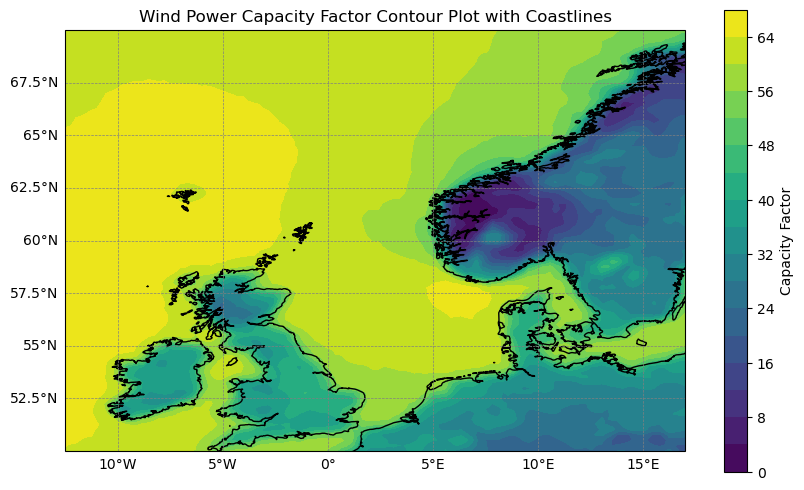

In [53]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Create a contour plot with coastlines
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
contour = plt.contourf(longitudes_mesh, latitudes_mesh, cap_fac_store, cmap='viridis', levels=20, transform=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Set the extent to cut off at specific latitude and longitude values
ax.set_xlim([-12.5, 17])
ax.set_ylim([50, 70])

plt.colorbar(contour, label='Capacity Factor')
plt.title('Wind Power Capacity Factor Contour Plot with Coastlines')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The distance between (-1.6, 52.8) and (-12.5, 50.0): 816.71 km
Transmission Loss: 8.17%
The distance between (-1.6, 52.8) and (-12.252100840336134, 50.0): 800.89 km
Transmission Loss: 8.01%
The distance between (-1.6, 52.8) and (-12.004201680672269, 50.0): 785.12 km
Transmission Loss: 7.85%
The distance between (-1.6, 52.8) and (-11.756302521008404, 50.0): 769.41 km
Transmission Loss: 7.69%
The distance between (-1.6, 52.8) and (-11.508403361344538, 50.0): 753.76 km
Transmission Loss: 7.54%
The distance between (-1.6, 52.8) and (-11.260504201680671, 50.0): 738.18 km
Transmission Loss: 7.38%
The distance between (-1.6, 52.8) and (-11.012605042016807, 50.0): 722.66 km
Transmission Loss: 7.23%
The distance between (-1.6, 52.8) and (-10.764705882352942, 50.0): 707.22 km
Transmission Loss: 7.07%
The distance between (-1.6, 52.8) and (-10.516806722689076, 50.0): 691.86 km
Transmission Loss: 6.92%
The distance between (-1.6, 52.8) and (-10.26890756302521, 50.0): 676.58 km
Transmission Loss: 6

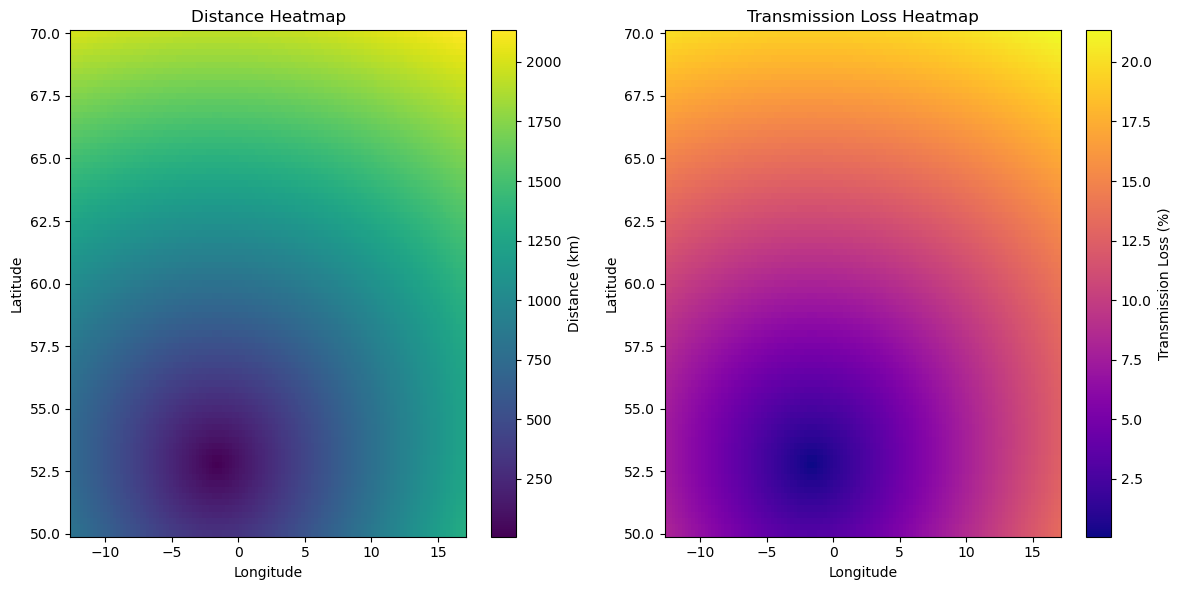

In [54]:


# Round mean_location_x and mean_location_y to two decimal places
mean_location_x = round(mean_location_x, 1)
mean_location_y = round(mean_location_y, 1)
transmission_loss_factor = 0.01 

# Specify the location for the transmission point
transmission_location = (mean_location_x, mean_location_y)

# Create a meshgrid of latitudes and longitudes
longitudes_mesh, latitudes_mesh = np.meshgrid(longitudes, latitudes)
# Specify latitude and longitude ranges

latitude_range = np.linspace(50, 70, num_groups)
longitude_range = np.linspace(-12.5, 17, num_coords)

# Initialize arrays to store distances and transmission losses
distances = np.zeros((num_groups, num_coords))
transmission_losses = np.zeros((num_groups, num_coords))

# Calculate distances and transmission losses for each point in the specified range
for i, lat in enumerate(latitude_range):
    for j, lon in enumerate(longitude_range):
        distance = haversine_distance(transmission_location[1], transmission_location[0], lat, lon)
        transmission_loss = distance * transmission_loss_factor
        distances[i, j] = distance
        transmission_losses[i, j] = transmission_loss
        print(f"The distance between {transmission_location} and ({lon}, {lat}): {distance:.2f} km")
        print(f"Transmission Loss: {transmission_loss:.2f}%")

# Plot heatmap for distances
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pcolormesh(longitude_range, latitude_range, distances, cmap='viridis')
plt.colorbar(label='Distance (km)')
plt.title('Distance Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Plot heatmap for transmission losses
plt.subplot(1, 2, 2)
plt.pcolormesh(longitude_range, latitude_range, transmission_losses, cmap='plasma')
plt.colorbar(label='Transmission Loss (%)')
plt.title('Transmission Loss Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()





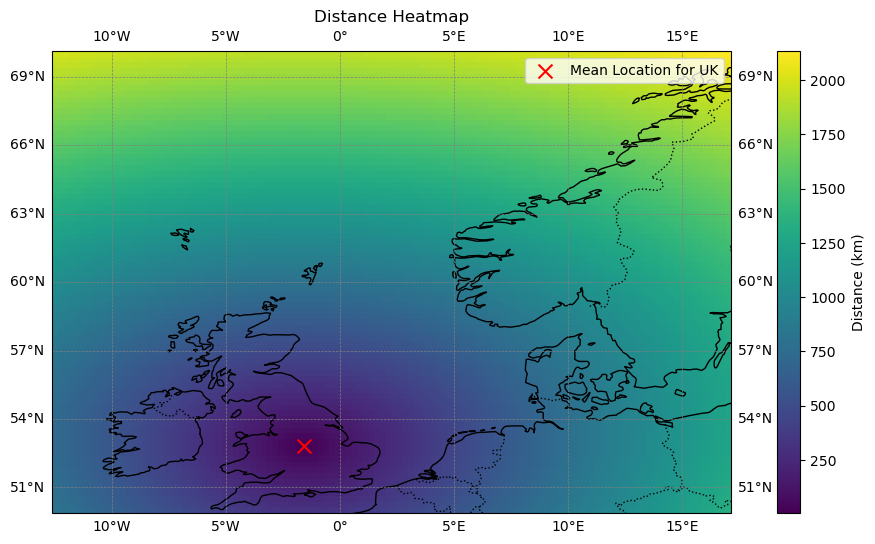

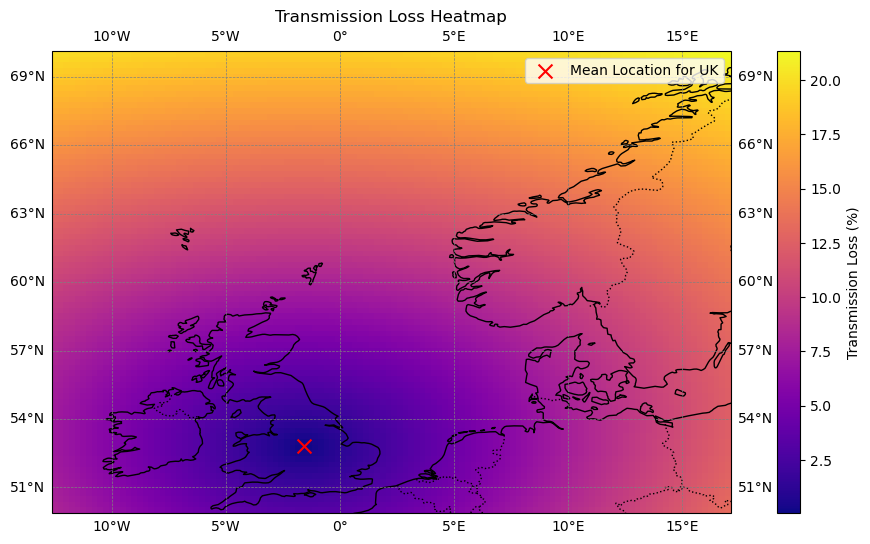

In [55]:
# Round mean_location_x and mean_location_y to two decimal places
mean_location_x = round(mean_location_x, 1)
mean_location_y = round(mean_location_y, 1)
transmission_loss_factor = 0.01

# Specify the location for the transmission point
transmission_location = (mean_location_x, mean_location_y)

latitude_range = np.linspace(50, 70, num_groups)
longitude_range = np.linspace(-12.5, 17, num_coords)

# Initialize arrays to store distances and transmission losses
distances = np.zeros((num_groups, num_coords))
transmission_losses = np.zeros((num_groups, num_coords))

# Calculate distances and transmission losses for each point in the specified range
for i, lat in enumerate(latitude_range):
    for j, lon in enumerate(longitude_range):
        distance = haversine_distance(transmission_location[1], transmission_location[0], lat, lon)
        transmission_loss = distance * transmission_loss_factor
        distances[i, j] = distance
        transmission_losses[i, j] = transmission_loss

# Plot heatmap for distances
plt.figure(figsize=(12, 6))
ax1 = plt.axes(projection=ccrs.PlateCarree())
pcm1 = ax1.pcolormesh(longitude_range, latitude_range, distances, cmap='viridis')
plt.colorbar(pcm1, label='Distance (km)', ax=ax1)  # Use plt.colorbar with the specific mappable (pcm1)

# Add cross at mean location
ax1.scatter(mean_location_x, mean_location_y, marker='x', color='red', s=100, label='Mean Location for UK')

ax1.set_title('Distance Heatmap')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Add coastlines, land borders, and gridlines
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
ax1.legend()

plt.show()

# Plot heatmap for transmission losses
plt.figure(figsize=(12, 6))
ax2 = plt.axes(projection=ccrs.PlateCarree())
pcm2 = ax2.pcolormesh(longitude_range, latitude_range, transmission_losses, cmap='plasma')
plt.colorbar(pcm2, label='Transmission Loss (%)', ax=ax2)  # Use plt.colorbar with the specific mappable (pcm2)

# Add cross at mean location
ax2.scatter(mean_location_x, mean_location_y, marker='x', color='red', s=100, label='Mean Location for UK')

ax2.set_title('Transmission Loss Heatmap')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Add coastlines, land borders, and gridlines
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
ax2.legend()

plt.show()




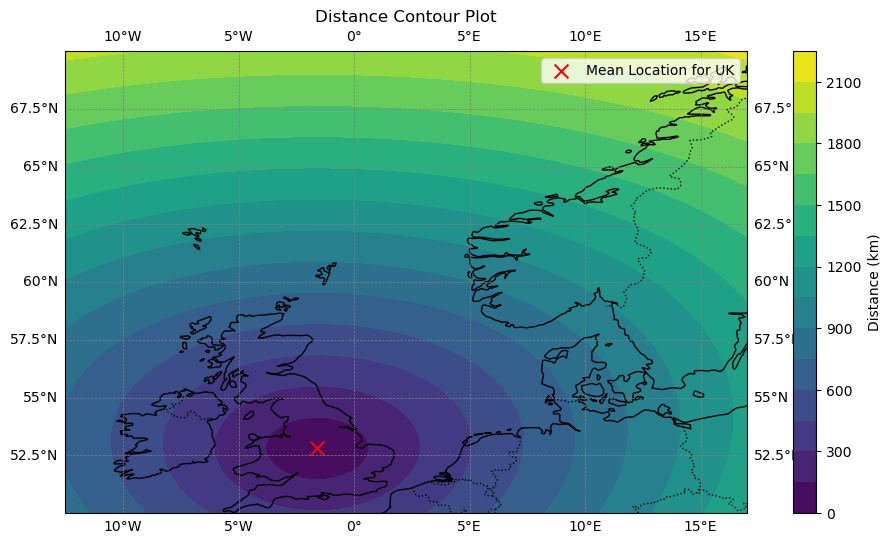

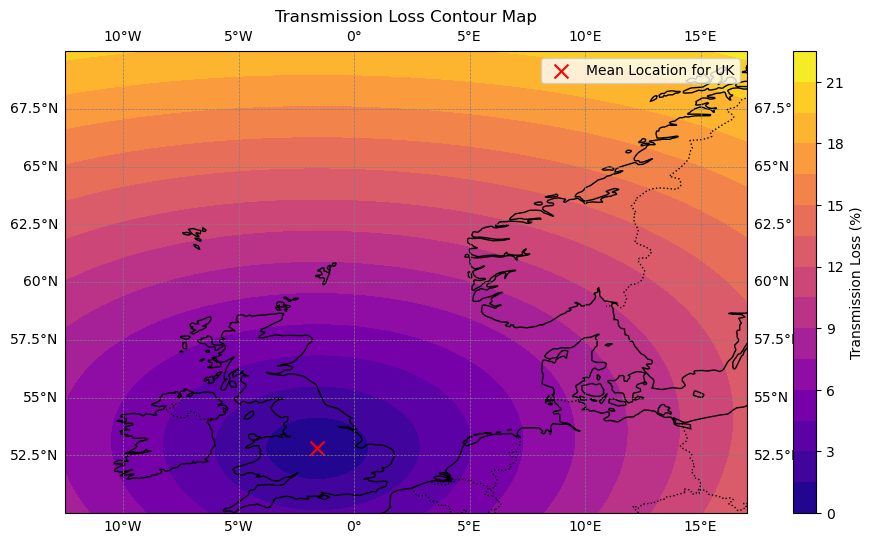

In [56]:
# Plot heatmap for distances
plt.figure(figsize=(12, 6))
ax1 = plt.axes(projection=ccrs.PlateCarree())
contour1 = ax1.contourf(longitude_range, latitude_range, distances, cmap='viridis', levels=20)
plt.colorbar(contour1, label='Distance (km)', ax=ax1)

# Add cross at mean location
ax1.scatter(mean_location_x, mean_location_y, marker='x', color='red', s=100, label='Mean Location for UK')

ax1.set_title('Distance Contour Plot')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Add coastlines, land borders, and gridlines
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
ax1.legend()

plt.show()

# Plot heatmap for transmission losses
plt.figure(figsize=(12, 6))
ax2 = plt.axes(projection=ccrs.PlateCarree())
contour2 = ax2.contourf(longitude_range, latitude_range, transmission_losses, cmap='plasma', levels=20)
plt.colorbar(contour2, label='Transmission Loss (%)', ax=ax2)

# Add cross at mean location
ax2.scatter(mean_location_x, mean_location_y, marker='x', color='red', s=100, label='Mean Location for UK')

ax2.set_title('Transmission Loss Contour Map')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Add coastlines, land borders, and gridlines
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
ax2.legend()

plt.show()










In [ ]:
# Define latitude and longitude values
latitudes = np.linspace(50, 70, num_groups)
longitudes = np.linspace(-12.5, 17, num_coords)

# Create a meshgrid of latitudes and longitudes
longitudes_mesh, latitudes_mesh = np.meshgrid(longitudes, latitudes)

# Initialize cap_fac_store with the correct shape
cap_fac_store = np.zeros((num_coords, num_groups))

for i in range(num_coords):
    current_longitude = longitudes[i]

    for j in range(num_groups):
        current_latitude = latitudes[j]

        ds_cpf = ds['power'].sel(latitude=current_latitude, longitude=current_longitude, method='nearest').mean(dim='time').values
        cap_factor = loss_factor * ds_cpf / 80

        # Calculate transmission loss based on the distance (0.45% per 100km)
        distance_km = haversine_distance(mean_location_y, mean_location_x, current_latitude, current_longitude)
        transmission_loss_factor = 1 - (distance_km *0.01 / 100)

        # Apply transmission loss penalty
        cap_factor_with_loss = cap_factor * transmission_loss_factor

        # Print values
        print(f"Latitude: {current_latitude:.2f}, Longitude: {current_longitude:.2f}, "
              f"Cap Factor with Loss: {cap_factor_with_loss:.4f}")

        cap_fac_store[i, j] = cap_factor_with_loss

# Create a regular heatmap with coastlines
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
heatmap = plt.pcolormesh(longitudes_mesh, latitudes_mesh, cap_fac_store.T, cmap='viridis', shading='auto', transform=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Set the extent to cut off at specific latitude and longitude values
ax.set_xlim([-12.5, 17])
ax.set_ylim([50, 70])

plt.scatter(mean_location_x, mean_location_y, marker='x', color='red', s=100, label='Mean Location')
plt.colorbar(heatmap, label='Capacity Factor with Transmission Loss')
plt.title('Wind Power Capacity Factor Heatmap with Coastlines (including Transmission Loss)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()






/share/data1/xzcaplbl/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/share/data1/xzcaplbl/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


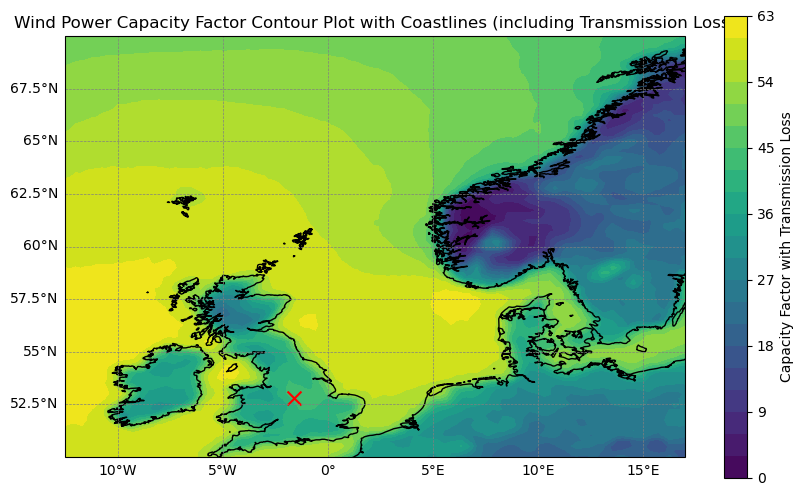

In [32]:
# Create a regular contour plot with coastlines
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
contour = plt.contourf(longitudes_mesh, latitudes_mesh, cap_fac_store.T, cmap='viridis', levels=20, transform=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Set the extent to cut off at specific latitude and longitude values
ax.set_xlim([-12.5, 17])
ax.set_ylim([50, 70])

plt.scatter(mean_location_x, mean_location_y, marker='x', color='red', s=100, label='Mean Location')
plt.colorbar(contour, label='Capacity Factor with Transmission Loss')
plt.title('Wind Power Capacity Factor Contour Plot with Coastlines (including Transmission Loss)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


/share/data1/xzcaplbl/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/share/data1/xzcaplbl/anaconda3/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


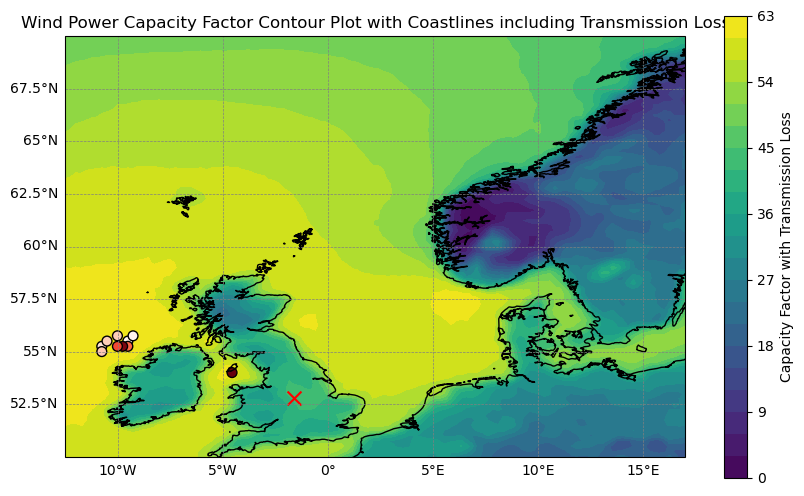

In [33]:
# Create a regular contour plot with coastlines
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
contour = plt.contourf(longitudes_mesh, latitudes_mesh, cap_fac_store.T, cmap='viridis', levels=20, transform=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines(resolution='10m', color='black', linewidth=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


# Find the indices of the top 10 maximum values in cap_fac_store
top10_indices = np.unravel_index(np.argpartition(cap_fac_store.flatten(), -10)[-10:], cap_fac_store.shape)

# Extract the coordinates and values of the top 10 locations
top10_values = cap_fac_store[top10_indices]
top10_latitudes = latitudes[top10_indices[1]]
top10_longitudes = longitudes[top10_indices[0]]

# Mark the top 10 locations with the highest capacity factor with loss
plt.scatter(top10_longitudes, top10_latitudes, c=top10_values, cmap='Reds', s=50, marker='o', edgecolors='black', linewidths=1, transform=ccrs.PlateCarree())
plt.scatter(mean_location_x, mean_location_y, marker='x', color='red', s=100, label='Mean Location')

# Set the extent to cut off at specific latitude and longitude values
ax.set_xlim([-12.5, 17])
ax.set_ylim([50, 70])

plt.colorbar(contour, label='Capacity Factor with Transmission Loss')
plt.title('Wind Power Capacity Factor Contour Plot with Coastlines including Transmission Loss')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
